In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance
import itertools
import seaborn as sns
from sklearn.svm import LinearSVC,SVC
from sklearn.multiclass import OneVsRestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LassoCV,LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from sklearn.feature_selection import chi2,SelectKBest,SelectFromModel,RFE,VarianceThreshold
from sklearn.metrics import confusion_matrix,precision_recall_curve,average_precision_score,roc_curve,auc,f1_score,accuracy_score,\
classification_report,multilabel_confusion_matrix, roc_auc_score,precision_recall_fscore_support
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder,LabelBinarizer
from scipy import interp
from itertools import cycle
plt.style.use('ggplot');
import sys
if ("/your/path/to/xelatex") not in sys.path:
    print('adding path') # I just add this to know if the path was present or not.
    sys.path.append("/your/path/to/xelatex")

adding path


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import learning_curve
## Train Test Split without upsampling
from sklearn.model_selection import train_test_split

In [3]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from sklearn.model_selection import train_test_split
# from google.colab import output

from pandas import DatetimeIndex as dt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
# from google.colab import files
import IPython
from IPython.display import HTML, display, clear_output 
# from google.colab import drive
import sys

# hyper-parameters optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# metrics
from sklearn.metrics import matthews_corrcoef as mcc
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import precision_score as TP_rate                          
from sklearn.metrics import roc_auc_score as roc_auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score as recall
from sklearn.metrics import average_precision_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer,fbeta_score
from sklearn.model_selection import StratifiedKFold


# classifiers
from sklearn.ensemble import RandomForestClassifier
# BaggingClassifier, AdaBoostRegressor, RandomForestRegressor, GradientBoostingClassifier, StackingClassifier, VotingClassifier #
from sklearn.tree import DecisionTreeClassifier     #
from sklearn.svm import SVC                                    # both linear and radial classification
from sklearn.neighbors import KNeighborsClassifier             # k=3
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.base import clone

from sklearn.model_selection import StratifiedKFold

import ast


import pickle

# ignore warnings when graphs are plotted
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV #Paramterizers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Accuracy metrics
import itertools #Used for iterations
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.neighbors import KNeighborsClassifier

In [6]:
data = pd.read_stata("Anemia3.dta")
data

,Age,Region,Residence,Altitude,Educational_status,Source_drinking_water,Toilet_facility,Religion,Family_size,Wealth_index,Current_contraceptive,Marital_status,Occupation,Media_exposure,Nutritional_status,Anemia_status
0,15-19,Oromia,Rural,High,Primary,Protected,Unimproved,Muslim,>=5,Poor,No,Unmarried,Not working,Yes,Normal,Not anemic
1,15-19,Oromia,Rural,High,No education,Unprotected,Unimproved,Muslim,>=5,Poor,No,Unmarried,Not working,No,Normal,Not anemic
2,15-19,Oromia,Rural,High,Primary,Protected,Unimproved,Muslim,>=5,Medium,No,Unmarried,Not working,No,Undernutrition,Not anemic
3,15-19,Oromia,Rural,High,Primary,Protected,Unimproved,Muslim,>=5,Medium,No,Unmarried,Not working,No,Undernutrition,Not anemic
4,15-19,Oromia,Rural,High,Primary,Protected,Unimproved,Muslim,>=5,Medium,No,Unmarried,Not working,No,Normal,Not anemic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,20-24,Dire Dawa,Urban,Low,Higher,Protected,Improved,Muslim,>=5,Rich,No,Unmarried,Working,Yes,Normal,Anemic
5638,20-24,Dire Dawa,Urban,Low,Secondary,Protected,Improved,Muslim,>=5,Rich,No,Unmarried,Not working,Yes,Over nutrition,Not anemic
5639,20-24,Addis Adaba,Urban,High,Primary,Protected,Unimproved,Orthodox,<5,Rich,No,Married,Working,Yes,Normal,Anemic
5640,20-24,Addis Adaba,Urban,High,Primary,Protected,Improved,Orthodox,<5,Rich,Yes,Unmarried,Working,Yes,Normal,Not anemic


In [7]:
data['Age'] = data['Age'].map({'15-19':0, '20-24':1})

In [8]:
data['Region'] = data['Region'].map({'Oromia':0, 'Addis Adaba':1, 'Tigray':2, 'SNNPR':3, 'Amhara':4, 'Somali':5, 
                'Afar':6, 'Benishangul':7, 'Dire Dawa':8, 'Gambela':9, 'Harari':10})

In [9]:
data['Residence'] = data['Residence'].map({'Urban':0, 'Rural':1})

In [10]:
data['Altitude'] = data['Altitude'].map({'Low':0, 'High':1})

In [11]:
data['Educational_status'] = data['Educational_status'].map({'No education':0, 'Primary':1, 'Secondary':2,'Higher':3 })

In [12]:
data['Source_drinking_water'] = data['Source_drinking_water'].map({'Protected':0, 'Unprotected':1})

In [13]:
data['Toilet_facility'] = data['Toilet_facility'].map({'Improved':0, 'Unimproved':1})

In [14]:
data['Religion'] = data['Religion'].map({'Orthodox':0, 'Muslim':1, 'Protestant':2,'Others':3})

In [15]:
data['Family_size'] = data['Family_size'].map({'<5':0, '>=5':1})

In [16]:
data['Wealth_index'] = data['Wealth_index'].map({'Rich':0, 'Medium':1, 'Poor':2})

In [17]:
data['Occupation'] = data['Occupation'].map({'Not working':0, 'Working':1})

In [18]:
data['Media_exposure'] = data['Media_exposure'].map({'Yes':0, 'No':1})

In [19]:
data['Marital_status'] = data['Marital_status'].map({'Unmarried':0, 'Married':1})

In [20]:
data['Nutritional_status'] = data['Nutritional_status'].map({'Undernutrition':0, 'Normal':1, 'Over nutrition':2})

In [21]:
data['Anemia_status'] = data['Anemia_status'].map({'Not anemic':0, 'Anemic':1})

In [22]:
data['Current_contraceptive'] = data['Current_contraceptive'].map({'No':0, 'Yes':1})

In [23]:
data['Marital_status'].value_counts()

Marital_status
0    3419
1    2223
Name: count, dtype: int64

In [25]:
data

,Age,Region,Residence,Altitude,Educational_status,Source_drinking_water,Toilet_facility,Religion,Family_size,Wealth_index,Current_contraceptive,Marital_status,Occupation,Media_exposure,Nutritional_status,Anemia_status
0,0,0,1,1,1,0,1,1,1,2,0,0,0,0,1,0
1,0,0,1,1,0,1,1,1,1,2,0,0,0,1,1,0
2,0,0,1,1,1,0,1,1,1,1,0,0,0,1,0,0
3,0,0,1,1,1,0,1,1,1,1,0,0,0,1,0,0
4,0,0,1,1,1,0,1,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,1,8,0,0,3,0,0,1,1,0,0,0,1,0,1,1
5638,1,8,0,0,2,0,0,1,1,0,0,0,0,0,2,0
5639,1,1,0,1,1,0,1,0,0,0,0,1,1,0,1,1
5640,1,1,0,1,1,0,0,0,0,0,1,0,1,0,1,0


# Handle Imbalanced Class

In [26]:
# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_resample(data.loc[:,data.columns!='Anemia_status'], data['Anemia_status'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (8414, 15)
Shape of y: (8414,)


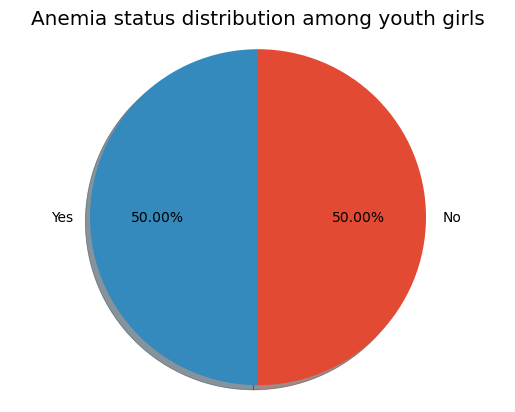

In [28]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['No','Yes']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Anemia status distribution among youth girls')
plt.show()

In [29]:
def split_train_valid_test(X,y,test_size=0.2,random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=test_size/(1-test_size), random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X,y,test_size=0.2,random_state=42)
_, train_counts = np.unique(y_train, return_counts=True)
_, valid_counts = np.unique(y_valid, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
print("[train] # class 0: {} | # class 1: {}".format(train_counts[0],train_counts[1]))
print("[valid] # class 0: {} | # class 1: {}".format(valid_counts[0],valid_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0],test_counts[1]))

[train] # class 0: 2524 | # class 1: 2524
[valid] # class 0: 841 | # class 1: 842
[test]  # class 0: 842 | # class 1: 841


In [30]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity

In [34]:
# Plot learning curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Anemia status among youth girls")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#80CBC4",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#00897B",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
def plot_cm(y_test,y_pred):
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");
    # labels, title and ticks
    ax.set_xlabel("Predicted labels");
    ax.set_ylabel("True labels"); 
    ax.set_title("Confusion Matrix"); 
    ax.xaxis.set_ticklabels(["No", "Yes"]);
    ax.yaxis.set_ticklabels(["No", "Yes"]);
    print("Classification Report")
    print(classification_report(y_test, y_pred))

In [35]:
# Support Vector Machine (SVM)


In [36]:
start = timer.time()
svm_model = SVC(kernel='poly',probability=True)
svm_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_svm = svm_model.predict(X_test_std)
y_svm_prob = svm_model.predict_proba(X_test_std)

Finished training within 7.93 seconds


Classification report for SVM:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       842
           1       0.82      0.64      0.72       841

    accuracy                           0.75      1683
   macro avg       0.76      0.75      0.75      1683
weighted avg       0.76      0.75      0.75      1683

Confusion matrix for SVM:
[[725 117]
 [301 540]]
Accuracy score for SVM: 0.75
Precision score for SVM: 0.82
Recall score for SVM: 0.64
F1 score for SVM: 0.72
Sensitivity score for SVM: 0.64
Specificity score for SVM: 0.86
AUC score for SVM: 0.78


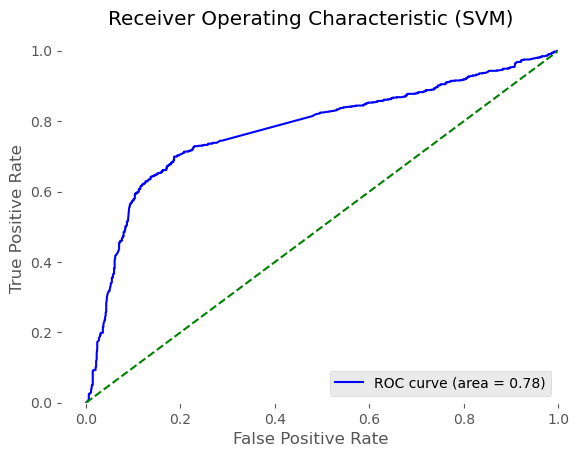

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
}

# Create the SVM model
svm_model = SVC(kernel='rbf', probability=True)

# Create the GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_std, y_train)

# Get the best SVM model with the optimal hyperparameters
best_svm_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_svm = best_svm_model.predict(X_test_std)
y_svm_prob = best_svm_model.predict_proba(X_test_std)

print("Classification report for SVM:\n{}".format(classification_report(y_test, y_svm)))
print("Confusion matrix for SVM:\n{}".format(confusion_matrix(y_test, y_svm)))
print("Accuracy score for SVM: {:.2f}".format(accuracy_score(y_test, y_svm)))

# Calculate precision, recall, and F1 scores
prec_svm = precision_score(y_test, y_svm)
rec_svm = recall_score(y_test, y_svm)
f1_svm = f1_score(y_test, y_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_svm).ravel()
sens_svm = tp / (tp + fn)
spec_svm = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_svm_prob[:,1])
auc_svm = roc_auc_score(y_test, y_svm_prob[:,1])

print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specificity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [46]:
from sklearn.svm import SVC
def model_SVC(X,x_test,y,y_test):
    params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
    model = SVC()
    gs_cv = GridSearchCV(model, 
                        params,
                        cv = 5,
                        n_jobs = -1,
                        verbose = 2).fit(X, y)
    gs_cv.best_params_
    tuned = SVC(**gs_cv.best_params_)
    scores_knn= cross_val_score(tuned, X, y, cv = 5)
    print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
    print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")
    tuned.fit(X, y)
    plot_cm(y_test,tuned.predict(x_test))
    print("Best parameters")
    print(gs_cv.best_params_)
    plot_learning_curve(gs_cv.best_estimator_,title = "Learning curve/Anemia ", x = X, y = y, cv = 5);
    return gs_cv.best_params_, tuned

Fitting 5 folds for each of 25 candidates, totalling 125 fits
CrossValMeans: 0.712
CrossValStandard Deviation: 0.016
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       842
           1       0.78      0.70      0.74       841

    accuracy                           0.75      1683
   macro avg       0.75      0.75      0.75      1683
weighted avg       0.75      0.75      0.75      1683

Best parameters
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


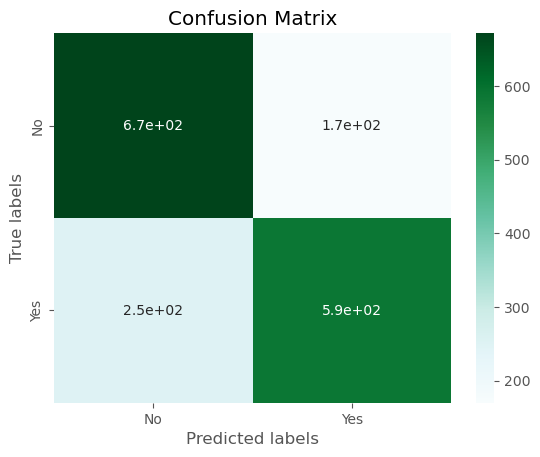

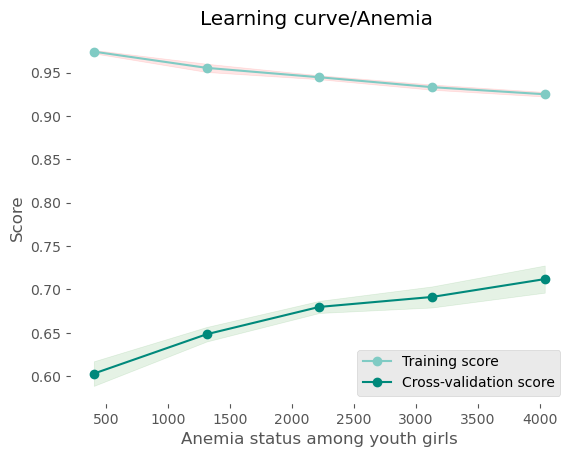

In [47]:
svc_params, svc_tuned = model_SVC(X_train, X_test, y_train, y_test)
ax= plt.gca()
ax.set_facecolor("white")

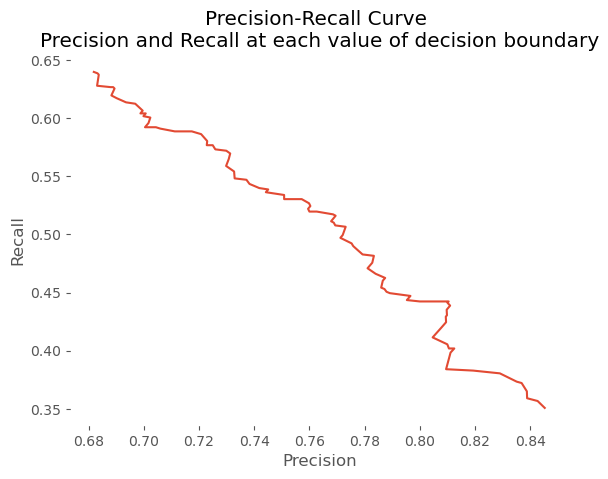

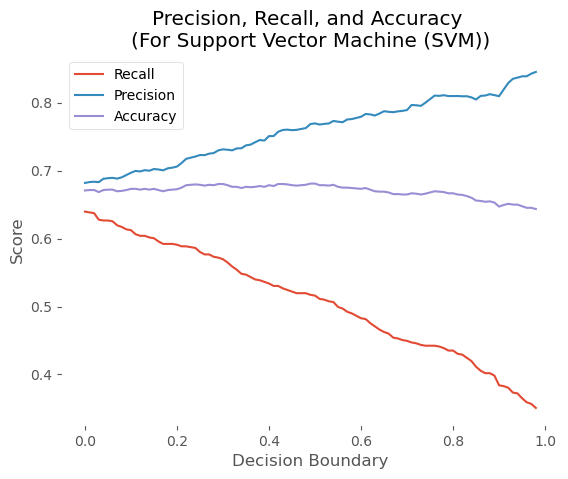

In [50]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

# Fit the SVM model with training data
svm_model.fit(X_train_std, y_train)

y_scores = svm_model.decision_function(X_test)
precision = []
recall = []
accuracy = []

# Calculate precision, recall, and accuracy at each value of threshold - up to 0.99
for threshold in np.arange(0, 0.99, 0.01):
    y_pred = np.where(y_scores >= threshold, 1, 0)
    
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))

# Plot precision-recall curve
plt.figure()
plt.plot(precision, recall)
plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
plt.xlabel('Precision')
ax = plt.gca()
ax.set_facecolor("white")
plt.ylabel('Recall')

# Plot precision, recall, and accuracy scores
plt.figure()
plt.plot(np.arange(0, 0.99, 0.01), recall, label='Recall')
plt.plot(np.arange(0, 0.99, 0.01), precision, label='Precision')
plt.plot(np.arange(0, 0.99, 0.01), accuracy, label='Accuracy')
plt.title('Precision, Recall, and Accuracy \n(For Support Vector Machine (SVM))')
plt.xlabel('Decision Boundary')
plt.ylabel('Score')
ax = plt.gca()
ax.set_facecolor("white")
plt.legend(facecolor='white')

plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

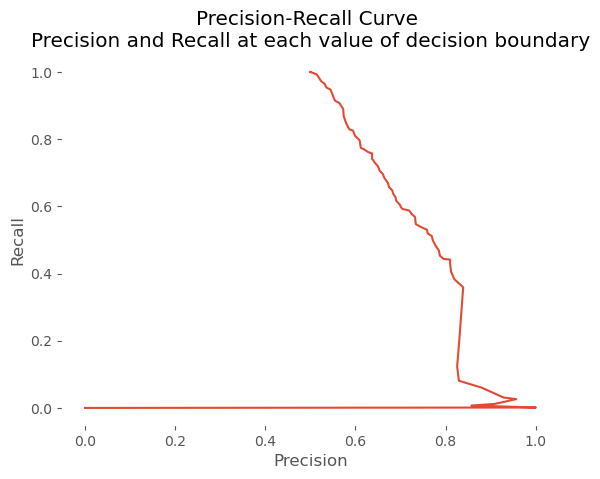

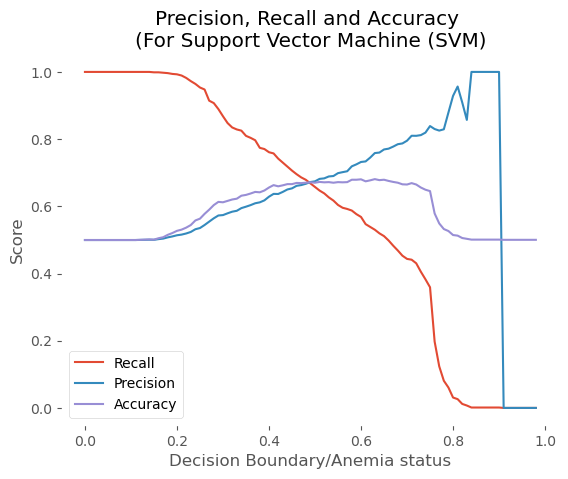

In [51]:
yprobs = svm_model.predict_proba(X_test)
yprobs = pd.DataFrame(yprobs)
precision = []
recall = []
accuracy = []

# calculate precision and accuracy at each value of threshold - only to 0.99 because no true values are predicted at 100% confidence!
for t in np.arange(0,0.99,0.01):
    tmp = yprobs
    tmp['Anemia_status'] = np.where(yprobs.iloc[:,1] >= t,1,0)
    
    precision.append(precision_score(y_test,tmp['Anemia_status']))
    recall.append(recall_score(y_test,tmp['Anemia_status']))
    accuracy.append(accuracy_score(y_test,tmp['Anemia_status']))
    plt.figure()
plt.plot(precision,recall)
plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
plt.xlabel('Precision')
ax= plt.gca()
ax.set_facecolor("white")
_ = plt.ylabel('Recall')
plt.figure()
plt.plot(np.arange(0,0.99,0.01),recall,label = 'Recall')
plt.plot(np.arange(0,0.99,0.01),precision,label = 'Precision')
plt.plot(np.arange(0,0.99,0.01),accuracy,label = 'Accuracy')
plt.title('Precision, Recall and Accuracy \n(For Support Vector Machine (SVM)')
plt.xlabel('Decision Boundary/Anemia status')
plt.ylabel('Score')
ax= plt.gca()
ax.set_facecolor("white")
_= plt.legend(facecolor= 'white')


In [52]:
#Gaussian Naive Bayes (GNB)
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_gnb = gnb_model.predict(X_test_std)
y_gnb_prob = gnb_model.predict_proba(X_test_std)

Finished training within 0.01 seconds


Classification report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       842
           1       0.61      0.64      0.63       841

    accuracy                           0.62      1683
   macro avg       0.62      0.62      0.62      1683
weighted avg       0.62      0.62      0.62      1683

Confusion matrix for Gaussian Naive Bayes:
[[500 342]
 [299 542]]
Accuracy score for Gaussian Naive Bayes: 0.62
Precision score for Gaussian Naive Bayes: 0.61
Recall score for Gaussian Naive Bayes: 0.64
F1 score for Gaussian Naive Bayes: 0.63
Sensitivity score for Gaussian Naive Bayes: 0.64
Specificity score for Gaussian Naive Bayes: 0.59
AUC score for Gaussian Naive Bayes: 0.66


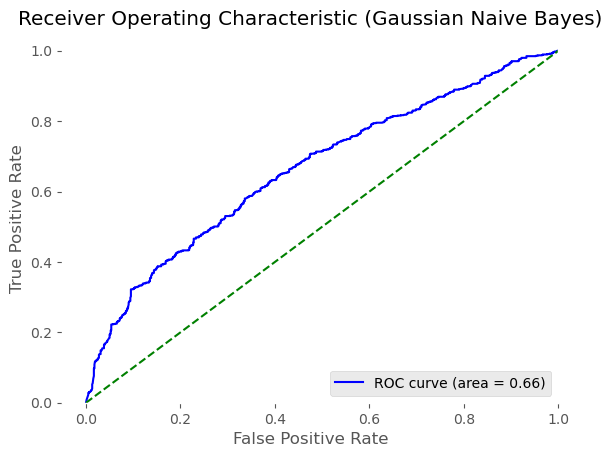

In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Define the parameter grid for grid search
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(gnb_model, param_grid, cv=5)
grid_search.fit(X_train_std, y_train)

# Get the best model after grid search
gnb_model = grid_search.best_estimator_

# Predict the test set results
y_gnb = gnb_model.predict(X_test_std)
y_gnb_prob = gnb_model.predict_proba(X_test_std)

print("Classification report for Gaussian Naive Bayes:\n{}".format(classification_report(y_test, y_gnb)))
print("Confusion matrix for Gaussian Naive Bayes:\n{}".format(confusion_matrix(y_test, y_gnb)))
print("Accuracy score for Gaussian Naive Bayes: {:.2f}".format(accuracy_score(y_test, y_gnb)))

# Calculate precision, recall, and F1 scores
prec_gnb = precision_score(y_test, y_gnb)
rec_gnb = recall_score(y_test, y_gnb)
f1_gnb = f1_score(y_test, y_gnb)
print("Precision score for Gaussian Naive Bayes: {:.2f}".format(prec_gnb))
print("Recall score for Gaussian Naive Bayes: {:.2f}".format(rec_gnb))
print("F1 score for Gaussian Naive Bayes: {:.2f}".format(f1_gnb))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_gnb).ravel()
sens_gnb = tp / (tp + fn)
spec_gnb = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_gnb_prob[:,1])
acc_gnb = roc_auc_score(y_test, y_gnb_prob[:,1])

print("Sensitivity score for Gaussian Naive Bayes: {:.2f}".format(sens_gnb))
print("Specificity score for Gaussian Naive Bayes: {:.2f}".format(spec_gnb))
print("AUC score for Gaussian Naive Bayes: {:.2f}".format(auc_gnb))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gnb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (Gaussian Naive Bayes)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

Classification report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       842
           1       0.71      0.73      0.72       841

    accuracy                           0.72      1683
   macro avg       0.72      0.72      0.72      1683
weighted avg       0.72      0.72      0.72      1683

Confusion matrix for Gradient Boosting:
[[593 249]
 [224 617]]
Accuracy score for Gradient Boosting: 0.72
Precision score for Gradient Boosting: 0.71
Recall score for Gradient Boosting: 0.73
F1 score for Gradient Boosting: 0.72
Sensitivity score for Gradient Boosting: 0.73
Specificity score for Gradient Boosting: 0.70
AUC score for Gradient Boosting: 0.79


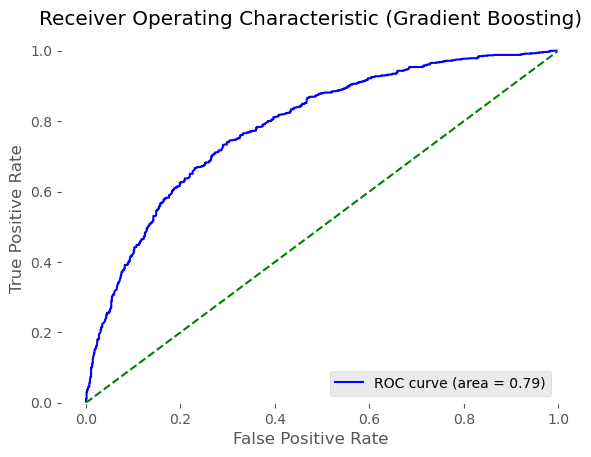

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)
import matplotlib.pyplot as plt

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Create the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=gb_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best Gradient Boosting model with the optimal hyperparameters
best_gb_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_gb = best_gb_model.predict(X_test)
y_gb_prob = best_gb_model.predict_proba(X_test)

print("Classification report for Gradient Boosting:\n{}".format(classification_report(y_test, y_gb)))
print("Confusion matrix for Gradient Boosting:\n{}".format(confusion_matrix(y_test, y_gb)))
print("Accuracy score for Gradient Boosting: {:.2f}".format(accuracy_score(y_test, y_gb)))

# Calculate precision, recall, and F1 scores
prec_gb = precision_score(y_test, y_gb)
rec_gb = recall_score(y_test, y_gb)
f1_gb = f1_score(y_test, y_gb)
print("Precision score for Gradient Boosting: {:.2f}".format(prec_gb))
print("Recall score for Gradient Boosting: {:.2f}".format(rec_gb))
print("F1 score for Gradient Boosting: {:.2f}".format(f1_gb))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_gb).ravel()
sens_gb = tp / (tp + fn)
spec_gb = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_gb_prob[:, 1])
auc_gb = roc_auc_score(y_test, y_gb_prob[:, 1])

print("Sensitivity score for Gradient Boosting: {:.2f}".format(sens_gb))
print("Specificity score for Gradient Boosting: {:.2f}".format(spec_gb))
print("AUC score for Gradient Boosting: {:.2f}".format(auc_gb))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (Gradient Boosting)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(estimator, X, y_true, ax=None, normalize=None, cmap='Blues'):
    y_pred = estimator.predict(X)
    classes = unique_labels(y_true, y_pred)
    
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    if ax is None:
        ax = plt.gca()
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')
    
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    return ax

def model_gnb(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    params = {}
    
    gs_cv = GridSearchCV(model, params, cv=5, n_jobs=-1, verbose=2)
    gs_cv.fit(X_train, y_train)
    
    best_params = gs_cv.best_params_
    tuned_model = GaussianNB(**best_params)
    
    scores = cross_val_score(tuned_model, X_train, y_train, cv=5)
    print(f"CrossValMeans: {round(scores.mean(), 3)}")
    print(f"CrossValStandard Deviation: {round(scores.std(), 3)}")
    
    tuned_model.fit(X_train, y_train)
    
    plot_confusion_matrix(tuned_model, X_test, y_test)
    plt.show()
    
    train_sizes, train_scores, test_scores = learning_curve(tuned_model, X_train, y_train, cv=5)
    
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Anemia among youth")
    plt.ylabel("Score")
    plt.grid()
    
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    
    plt.show()
    
    print("Best parameters:")
    print(best_params)
    
    return best_params, tuned_model

Fitting 5 folds for each of 1 candidates, totalling 5 fits
CrossValMeans: 0.634
CrossValStandard Deviation: 0.01


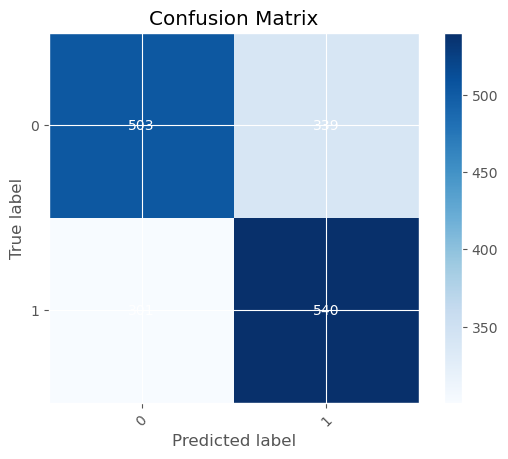

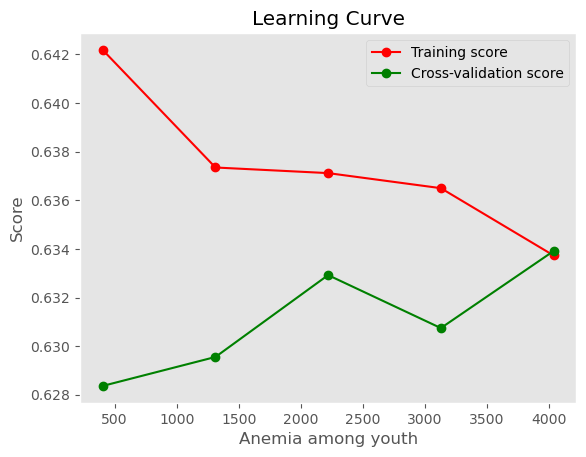

Best parameters:
{}


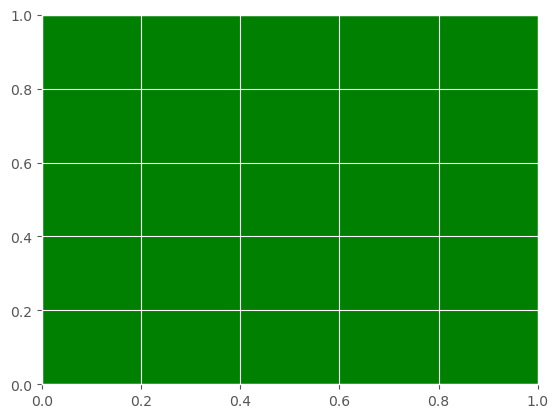

In [60]:
gnb_params, gnb_tuned = model_gnb(X_train, X_test, y_train, y_test)
ax= plt.gca()
ax.set_facecolor("green")

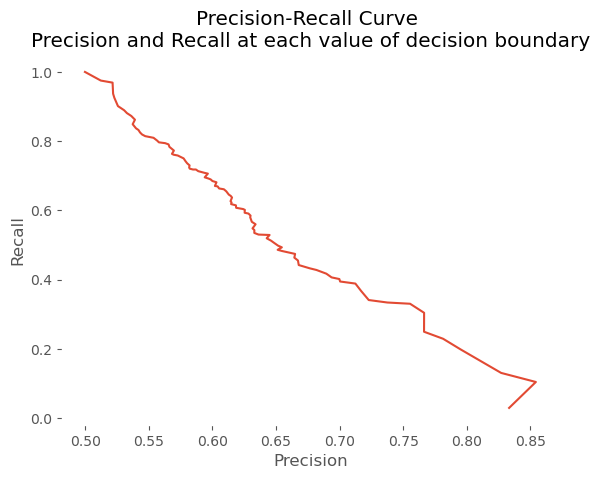

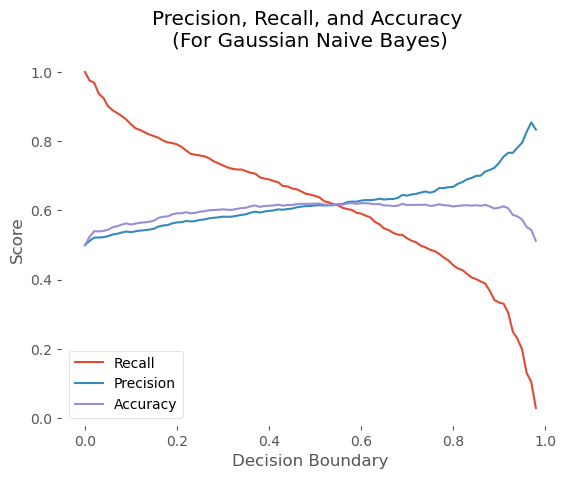

In [61]:
def evaluate_model(gnb_model, X_test, y_test):
    y_scores = gnb_model.predict_proba(X_test)[:, 1]
    precision = []
    recall = []
    accuracy = []

    # calculate precision and accuracy at each value of threshold - only up to 0.99 because no true values are predicted at 100% confidence!
    for threshold in np.arange(0, 0.99, 0.01):
        y_pred = np.where(y_scores >= threshold, 1, 0)

        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        accuracy.append(accuracy_score(y_test, y_pred))

    plt.figure()
    plt.plot(precision, recall)
    plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
    plt.xlabel('Precision')
    ax = plt.gca()
    ax.set_facecolor("white")
    plt.ylabel('Recall')

    plt.figure()
    plt.plot(np.arange(0, 0.99, 0.01), recall, label='Recall')
    plt.plot(np.arange(0, 0.99, 0.01), precision, label='Precision')
    plt.plot(np.arange(0, 0.99, 0.01), accuracy, label='Accuracy')
    plt.title('Precision, Recall, and Accuracy \n(For Gaussian Naive Bayes)')
    plt.xlabel('Decision Boundary')
    plt.ylabel('Score')
    ax = plt.gca()
    ax.set_facecolor("white")
    plt.legend(facecolor='white')

    plt.show()

# Assuming you have a trained Gaussian Naive Bayes model named gnb_model
evaluate_model(gnb_model, X_test, y_test)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

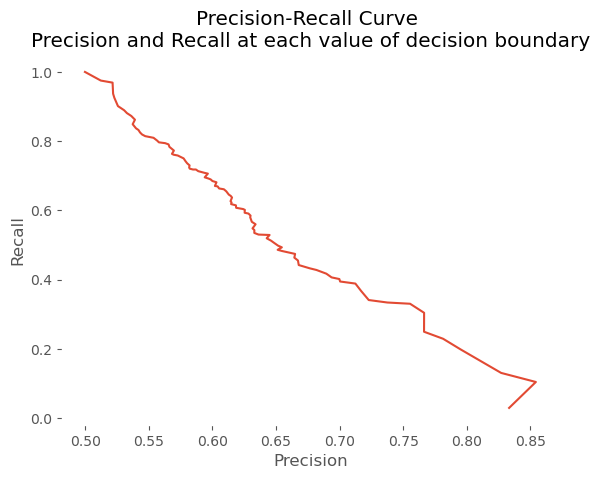

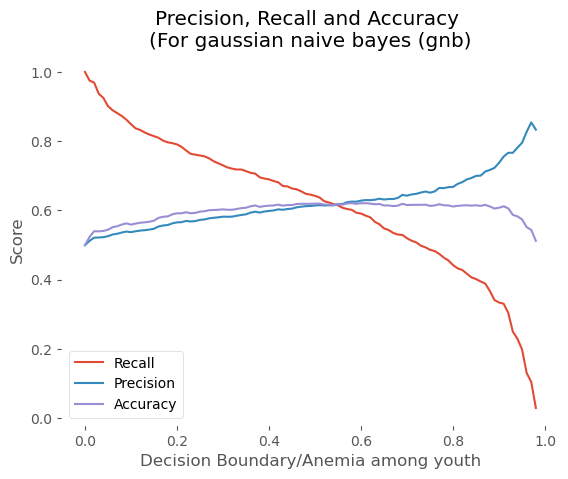

In [62]:
yprobs = gnb_model.predict_proba(X_test)
yprobs = pd.DataFrame(yprobs)
precision = []
recall = []
accuracy = []

# calculate precision and accuracy at each value of threshold - only to 0.99 because no true values are predicted at 100% confidence!
for t in np.arange(0,0.99,0.01):
    tmp = yprobs
    tmp['Anemia_status'] = np.where(yprobs.iloc[:,1] >= t,1,0)
    
    precision.append(precision_score(y_test,tmp['Anemia_status']))
    recall.append(recall_score(y_test,tmp['Anemia_status']))
    accuracy.append(accuracy_score(y_test,tmp['Anemia_status']))
    plt.figure()
plt.plot(precision,recall)
plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
plt.xlabel('Precision')
ax= plt.gca()
ax.set_facecolor("white")
_ = plt.ylabel('Recall')
plt.figure()
plt.plot(np.arange(0,0.99,0.01),recall,label = 'Recall')
plt.plot(np.arange(0,0.99,0.01),precision,label = 'Precision')
plt.plot(np.arange(0,0.99,0.01),accuracy,label = 'Accuracy')
plt.title('Precision, Recall and Accuracy \n(For gaussian naive bayes (gnb)')
plt.xlabel('Decision Boundary/Anemia among youth')
plt.ylabel('Score')
ax= plt.gca()
ax.set_facecolor("white")
_= plt.legend(facecolor= 'white')


In [63]:
from sklearn.linear_model import LogisticRegression

start = timer.time()
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end - start))

# Predicting the test set results
y_logit = logit_model.predict(X_test_std)
y_logit_prob = logit_model.predict_proba(X_test_std)

Finished training within 0.37 seconds


Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       842
           1       0.63      0.63      0.63       841

    accuracy                           0.63      1683
   macro avg       0.63      0.63      0.63      1683
weighted avg       0.63      0.63      0.63      1683

Confusion matrix for Logistic Regression:
[[530 312]
 [314 527]]
Accuracy score for Logistic Regression: 0.63
Precision score for Logistic Regression: 0.63
Recall score for Logistic Regression: 0.63
F1 score for Logistic Regression: 0.63
Sensitivity score for Logistic Regression: 0.63
Specificity score for Logistic Regression: 0.63
AUC score for Logistic Regression: 0.67


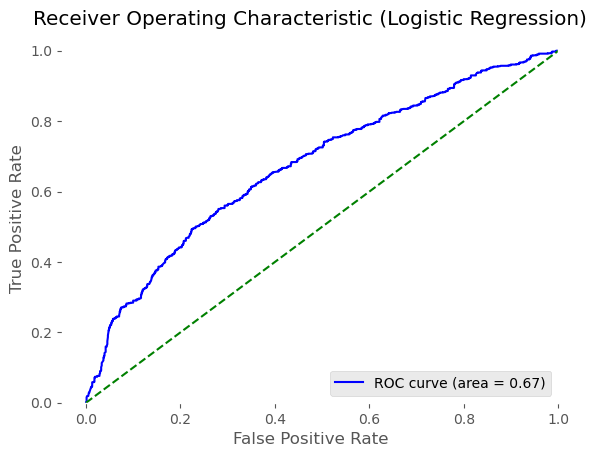

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)
import matplotlib.pyplot as plt

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create the Logistic Regression model
logit_model = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=logit_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best Logistic Regression model with the optimal hyperparameters
best_logit_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_logit = best_logit_model.predict(X_test)
y_logit_prob = best_logit_model.predict_proba(X_test)

print("Classification report for Logistic Regression:\n{}".format(classification_report(y_test, y_logit)))
print("Confusion matrix for Logistic Regression:\n{}".format(confusion_matrix(y_test, y_logit)))
print("Accuracy score for Logistic Regression: {:.2f}".format(accuracy_score(y_test, y_logit)))

# Calculate precision, recall, and F1 scores
prec_logit = precision_score(y_test, y_logit)
rec_logit = recall_score(y_test, y_logit)
f1_logit = f1_score(y_test, y_logit)
print("Precision score for Logistic Regression: {:.2f}".format(prec_logit))
print("Recall score for Logistic Regression: {:.2f}".format(rec_logit))
print("F1 score for Logistic Regression: {:.2f}".format(f1_logit))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_logit).ravel()
sens_logit = tp / (tp + fn)
spec_logit = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_logit_prob[:, 1])
acc_logit = roc_auc_score(y_test, y_logit_prob[:, 1])

print("Sensitivity score for Logistic Regression: {:.2f}".format(sens_logit))
print("Specificity score for Logistic Regression: {:.2f}".format(spec_logit))
print("AUC score for Logistic Regression: {:.2f}".format(auc_logit))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_logit)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (Logistic Regression)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
import numpy as np

def plot_confusion_matrix(estimator, X, y_true, ax=None, normalize=None, cmap='Blues'):
    y_pred = estimator.predict(X)
    classes = unique_labels(y_true, y_pred)

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if ax is None:
        ax = plt.gca()

    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    return ax

def model_logit(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    params = {}

    gs_cv = GridSearchCV(model, params, cv=5, n_jobs=-1, verbose=2)
    gs_cv.fit(X_train, y_train)

    best_params = gs_cv.best_params_
    tuned_model = LogisticRegression(**best_params)

    scores = cross_val_score(tuned_model, X_train, y_train, cv=5)
    print(f"CrossValMeans: {round(scores.mean(), 3)}")
    print(f"CrossValStandard Deviation: {round(scores.std(), 3)}")

    tuned_model.fit(X_train, y_train)

    plot_confusion_matrix(tuned_model, X_test, y_test)
    plt.show()

    train_sizes, train_scores, test_scores = learning_curve(tuned_model, X_train, y_train, cv=5)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Anemia among youth")
    plt.ylabel("Score")
    plt.grid()

    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")

    plt.show()

    print("Best parameters:")
    print(best_params)

    return best_params, tuned_model

Fitting 5 folds for each of 1 candidates, totalling 5 fits
CrossValMeans: 0.647
CrossValStandard Deviation: 0.004


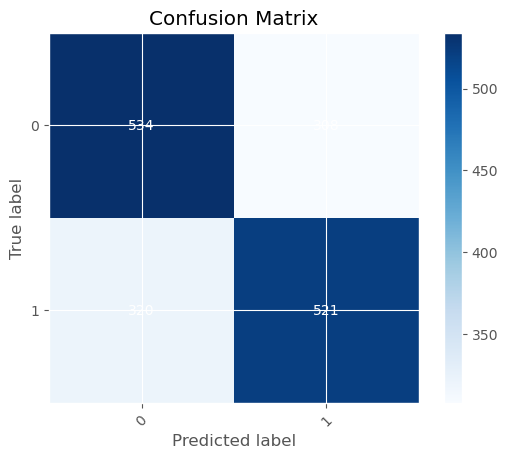

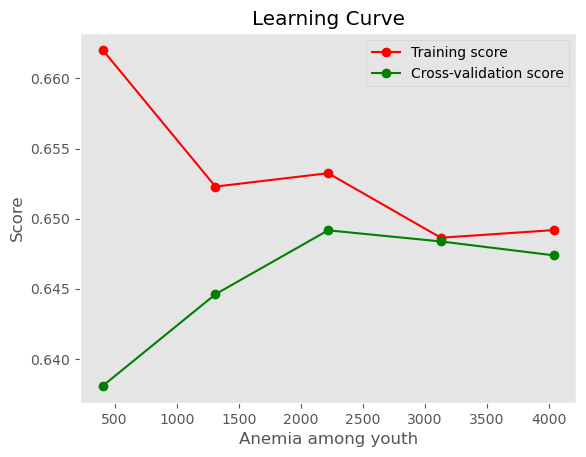

Best parameters:
{}


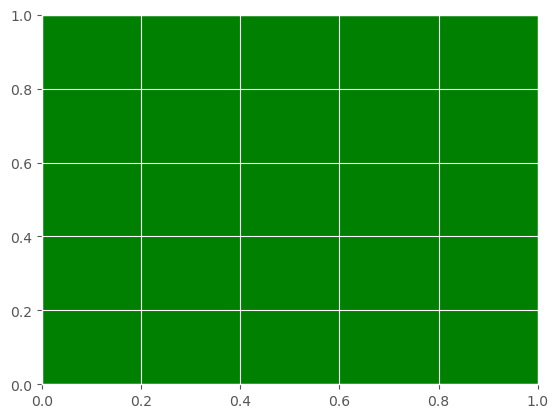

In [66]:
logit_params, logit_tuned = model_logit(X_train, X_test, y_train, y_test)
ax= plt.gca()
ax.set_facecolor("green")

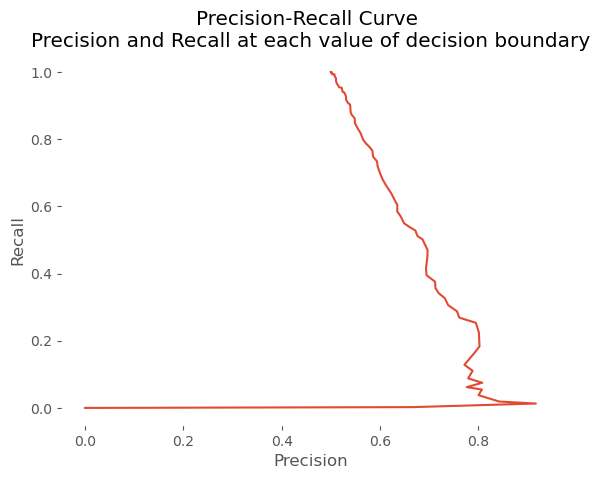

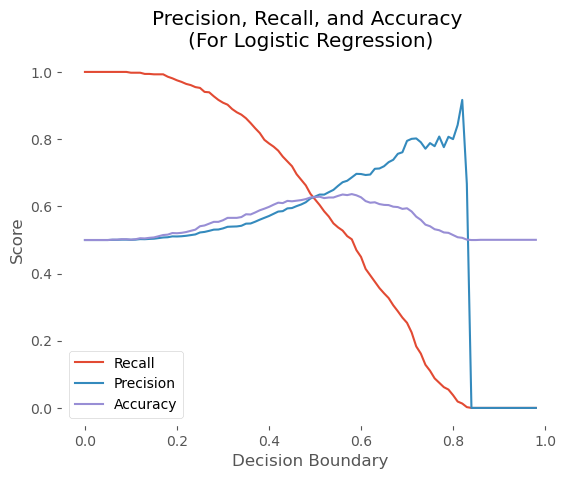

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    precision_score,
    recall_score,
    accuracy_score
)

def evaluate_model(logit_model, X_test, y_test):
    y_scores = logit_model.predict_proba(X_test)[:, 1]
    precision = []
    recall = []
    accuracy = []

    # calculate precision and accuracy at each value of threshold - only up to 0.99 because no true values are predicted at 100% confidence!
    for threshold in np.arange(0, 0.99, 0.01):
        y_pred = np.where(y_scores >= threshold, 1, 0)

        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        accuracy.append(accuracy_score(y_test, y_pred))

    plt.figure()
    plt.plot(precision, recall)
    plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
    plt.xlabel('Precision')
    ax = plt.gca()
    ax.set_facecolor("white")
    plt.ylabel('Recall')

    plt.figure()
    plt.plot(np.arange(0, 0.99, 0.01), recall, label='Recall')
    plt.plot(np.arange(0, 0.99, 0.01), precision, label='Precision')
    plt.plot(np.arange(0, 0.99, 0.01), accuracy, label='Accuracy')
    plt.title('Precision, Recall, and Accuracy \n(For Logistic Regression)')
    plt.xlabel('Decision Boundary')
    plt.ylabel('Score')
    ax = plt.gca()
    ax.set_facecolor("white")
    plt.legend(facecolor='white')

    plt.show()

# Assuming you have X_train, y_train, X_test, and y_test as your training and test data

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create the Logistic Regression model
logit_model = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=logit_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best Logistic Regression model with the optimal hyperparameters
best_logit_model = grid_search.best_estimator_

# Fit the logistic regression model on the training data
best_logit_model.fit(X_train, y_train)

# Evaluate the model using the evaluate_model() function
evaluate_model(best_logit_model, X_test, y_test)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

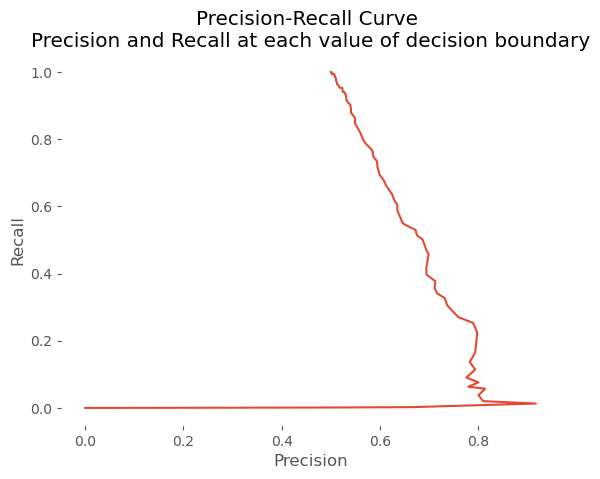

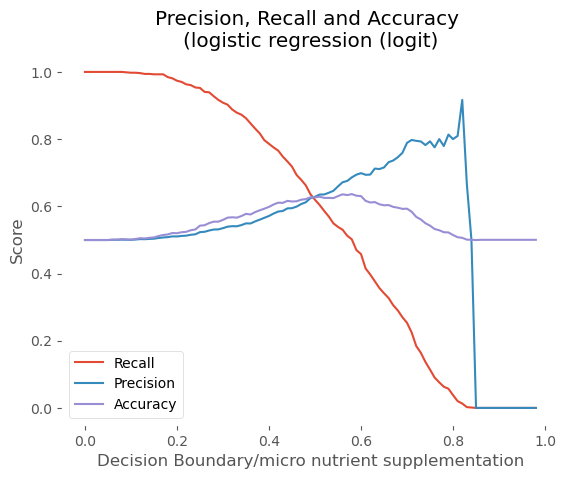

In [72]:
yprobs = logit_model.predict_proba(X_test)
yprobs = pd.DataFrame(yprobs)
precision = []
recall = []
accuracy = []

# calculate precision and accuracy at each value of threshold - only to 0.99 because no true values are predicted at 100% confidence!
for t in np.arange(0,0.99,0.01):
    tmp = yprobs
    tmp['Anemia_status'] = np.where(yprobs.iloc[:,1] >= t,1,0)
    
    precision.append(precision_score(y_test,tmp['Anemia_status']))
    recall.append(recall_score(y_test,tmp['Anemia_status']))
    accuracy.append(accuracy_score(y_test,tmp['Anemia_status']))
    plt.figure()
plt.plot(precision,recall)
plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
plt.xlabel('Precision')
ax= plt.gca()
ax.set_facecolor("white")
_ = plt.ylabel('Recall')
plt.figure()
plt.plot(np.arange(0,0.99,0.01),recall,label = 'Recall')
plt.plot(np.arange(0,0.99,0.01),precision,label = 'Precision')
plt.plot(np.arange(0,0.99,0.01),accuracy,label = 'Accuracy')
plt.title('Precision, Recall and Accuracy \n(logistic regression (logit)')
plt.xlabel('Decision Boundary/micro nutrient supplementation')
plt.ylabel('Score')
ax= plt.gca()
ax.set_facecolor("white")
_= plt.legend(facecolor= 'white')


In [73]:
### Decision Tree (DT)
start = timer.time()
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_dtree = dtree_model.predict(X_test_std)
y_dtree_prob = dtree_model.predict_proba(X_test_std)

Finished training within 0.03 seconds


Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       842
           1       0.65      0.60      0.62       841

    accuracy                           0.64      1683
   macro avg       0.64      0.64      0.64      1683
weighted avg       0.64      0.64      0.64      1683

Confusion matrix for Decision Tree:
[[569 273]
 [335 506]]
Accuracy score for Decision Tree: 0.64
Precision score for Decision Tree: 0.65
Recall score for Decision Tree: 0.60
F1 score for Decision Tree: 0.62
Sensitivity score for Decision Tree: 0.60
Specificity score for Decision Tree: 0.68
AUC score for Decision Tree: 0.69


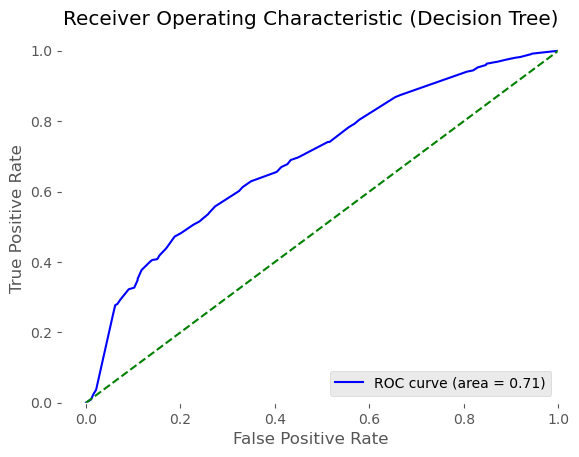

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)
import matplotlib.pyplot as plt

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Decision Tree model
dtree_model = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=dtree_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5
)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best Decision Tree model with the optimal hyperparameters
best_dtree_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_dtree = best_dtree_model.predict(X_test)
y_dtree_prob = best_dtree_model.predict_proba(X_test)

print("Classification report for Decision Tree:\n{}".format(classification_report(y_test, y_dtree)))
print("Confusion matrix for Decision Tree:\n{}".format(confusion_matrix(y_test, y_dtree)))
print("Accuracy score for Decision Tree: {:.2f}".format(accuracy_score(y_test, y_dtree)))

# Calculate precision, recall, and F1 scores
prec_dtree = precision_score(y_test, y_dtree)
rec_dtree = recall_score(y_test, y_dtree)
f1_dtree = f1_score(y_test, y_dtree)
print("Precision score for Decision Tree: {:.2f}".format(prec_dtree))
print("Recall score for Decision Tree: {:.2f}".format(rec_dtree))
print("F1 score for Decision Tree: {:.2f}".format(f1_dtree))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_dtree).ravel()
sens_dtree = tp / (tp + fn)
spec_dtree = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_dtree_prob[:, 1])
acc_dtree = roc_auc_score(y_test, y_dtree_prob[:, 1])

print("Sensitivity score for Decision Tree: {:.2f}".format(sens_dtree))
print("Specificity score for Decision Tree: {:.2f}".format(spec_dtree))
print("AUC score for Decision Tree: {:.2f}".format(acc_dtree))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_dtree)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (Decision Tree)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [75]:
#Using dtree
def model_dtree (X,x_test,y,y_test):
    
    dtree_params = {
                  "min_samples_leaf":[12]}
    n_jobs=-1
    dtree_model = DecisionTreeClassifier(random_state=42)
    gs_cv = GridSearchCV(dtree_model, 
                        dtree_params,
                        cv = 10,
                        n_jobs = -1,
                        verbose = 2).fit(X, y)
    gs_cv.best_params_
    dtree_tuned = RandomForestClassifier(**gs_cv.best_params_)
    scores_knn= cross_val_score(dtree_tuned, X, y, cv = 5)
    print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
    print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")
    dtree_tuned.fit(X, y)
    plot_cm(y_test,dtree_tuned.predict(x_test))
    print("Decision Tree(DT)")
    print(gs_cv.best_params_)
    plot_learning_curve(gs_cv.best_estimator_,title = "Learning curve/Decision Tree(DT)", x = X, y = y, cv = 5);
    
    return gs_cv.best_params_, dtree_tuned

Fitting 10 folds for each of 1 candidates, totalling 10 fits
CrossValMeans: 0.676
CrossValStandard Deviation: 0.012
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       842
           1       0.71      0.59      0.65       841

    accuracy                           0.68      1683
   macro avg       0.68      0.68      0.67      1683
weighted avg       0.68      0.68      0.67      1683

Decision Tree(DT)
{'min_samples_leaf': 12}


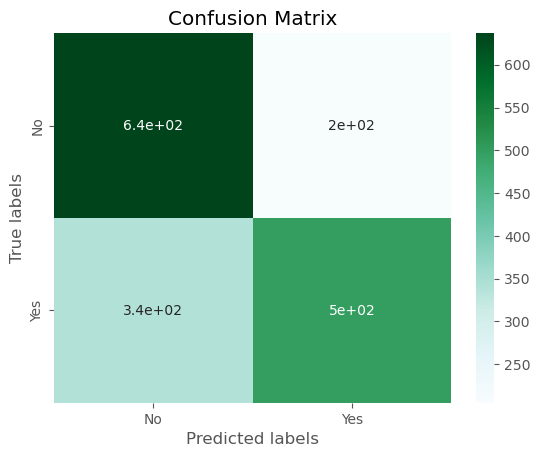

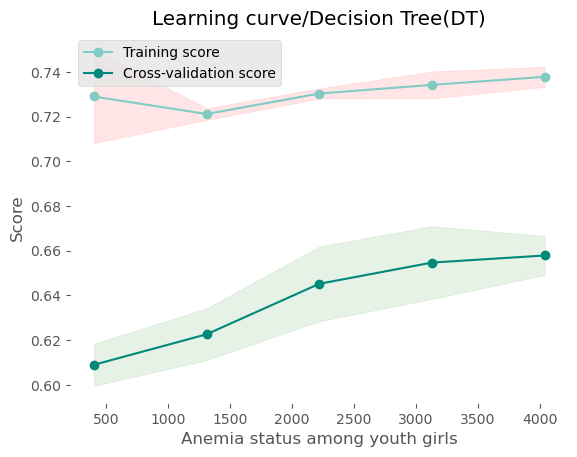

In [76]:
dtree_params, dtree_tuned = model_dtree(X_train, X_test, y_train, y_test)
ax= plt.gca()
ax.set_facecolor("white")

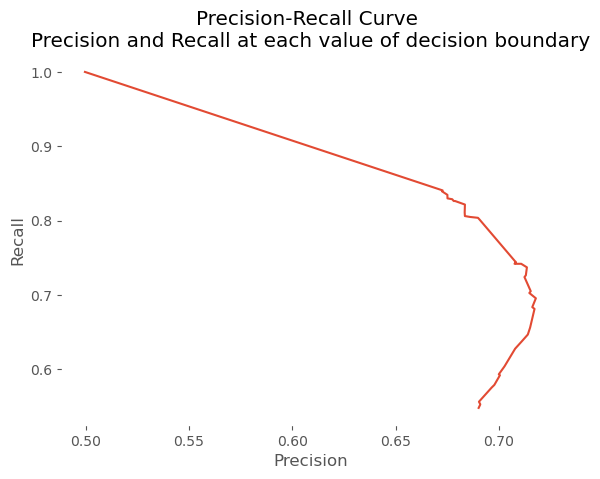

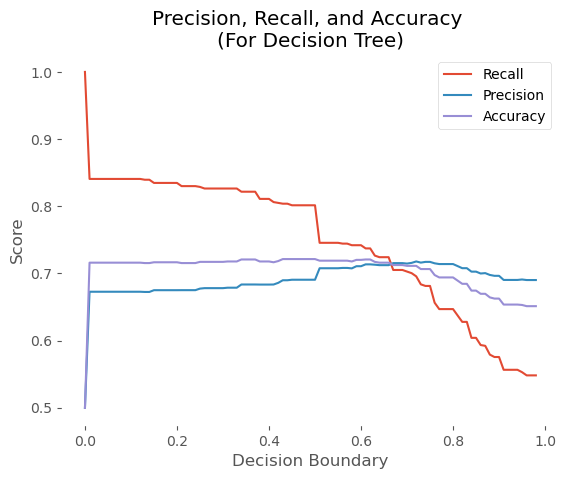

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(dtree_model, X_test, y_test):
    # Fit the decision tree model with training data
    dtree_model.fit(X_train, y_train)

    y_scores = dtree_model.predict_proba(X_test)[:, 1]
    precision = []
    recall = []
    accuracy = []

    # calculate precision and accuracy at each value of threshold - only up to 0.99 because no true values are predicted at 100% confidence!
    for threshold in np.arange(0, 0.99, 0.01):
        y_pred = np.where(y_scores >= threshold, 1, 0)

        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        accuracy.append(accuracy_score(y_test, y_pred))

    plt.figure()
    plt.plot(precision, recall)
    plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
    plt.xlabel('Precision')
    ax = plt.gca()
    ax.set_facecolor("white")
    plt.ylabel('Recall')

    plt.figure()
    plt.plot(np.arange(0, 0.99, 0.01), recall, label='Recall')
    plt.plot(np.arange(0, 0.99, 0.01), precision, label='Precision')
    plt.plot(np.arange(0, 0.99, 0.01), accuracy, label='Accuracy')
    plt.title('Precision, Recall, and Accuracy \n(For Decision Tree)')
    plt.xlabel('Decision Boundary')
    plt.ylabel('Score')
    ax = plt.gca()
    ax.set_facecolor("white")
    plt.legend(facecolor='white')

    plt.show()

# Assuming you have a trained Decision Tree model named dtree_model
evaluate_model(dtree_model, X_test, y_test)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

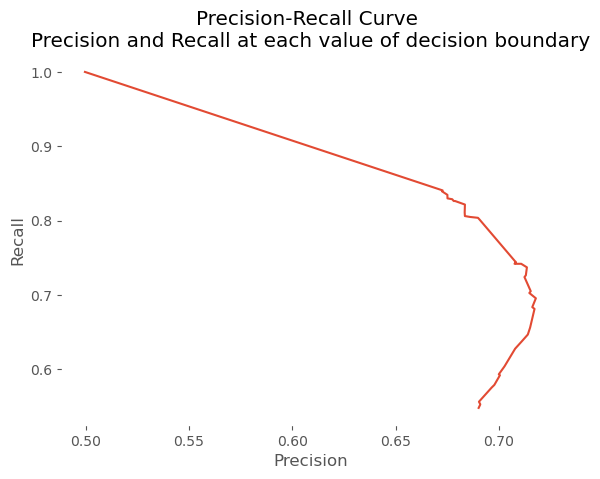

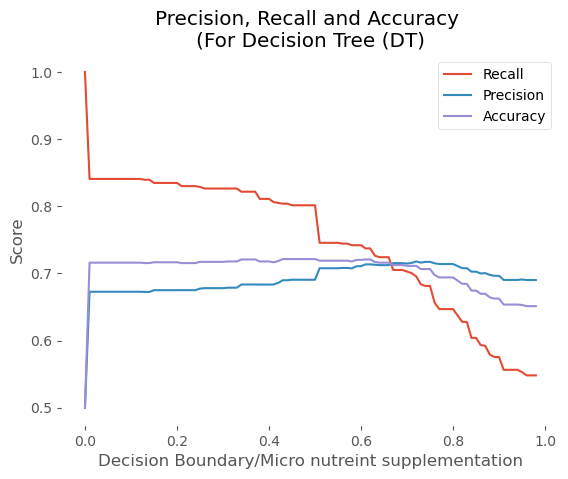

In [79]:
yprobs =dtree_model.predict_proba(X_test)
yprobs = pd.DataFrame(yprobs)
precision = []
recall = []
accuracy = []

# calculate precision and accuracy at each value of threshold - only to 0.99 because no true values are predicted at 100% confidence!
for t in np.arange(0,0.99,0.01):
    tmp = yprobs
    tmp['Anemia_status'] = np.where(yprobs.iloc[:,1] >= t,1,0)
    
    precision.append(precision_score(y_test,tmp['Anemia_status']))
    recall.append(recall_score(y_test,tmp['Anemia_status']))
    accuracy.append(accuracy_score(y_test,tmp['Anemia_status']))
    plt.figure()
plt.plot(precision,recall)
plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
plt.xlabel('Precision')
ax= plt.gca()
ax.set_facecolor("white")
_ = plt.ylabel('Recall')
plt.figure()
plt.plot(np.arange(0,0.99,0.01),recall,label = 'Recall')
plt.plot(np.arange(0,0.99,0.01),precision,label = 'Precision')
plt.plot(np.arange(0,0.99,0.01),accuracy,label = 'Accuracy')
plt.title('Precision, Recall and Accuracy \n(For Decision Tree (DT)')
plt.xlabel('Decision Boundary/Micro nutreint supplementation')
plt.ylabel('Score')
ax= plt.gca()
ax.set_facecolor("white")
_= plt.legend(facecolor= 'white')

In [80]:
start = timer.time()
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test_std)
y_ranfor_prob = ranfor_model.predict_proba(X_test_std)

Finished training within 1.04 seconds


Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       842
           1       0.74      0.74      0.74       841

    accuracy                           0.74      1683
   macro avg       0.74      0.74      0.74      1683
weighted avg       0.74      0.74      0.74      1683

Confusion matrix for RandomForestClassifier:
[[626 216]
 [219 622]]
Accuracy score for RandomForestClassifier: 0.74
Precision score for RandomForestClassifier: 0.74
Recall score for RandomForestClassifier: 0.74
F1 score for RandomForestClassifier: 0.74
Sensitivity score for RandomForestClassifier: 0.74
Specificity score for RandomForestClassifier: 0.74
AUC score for RandomForestClassifier: 0.80


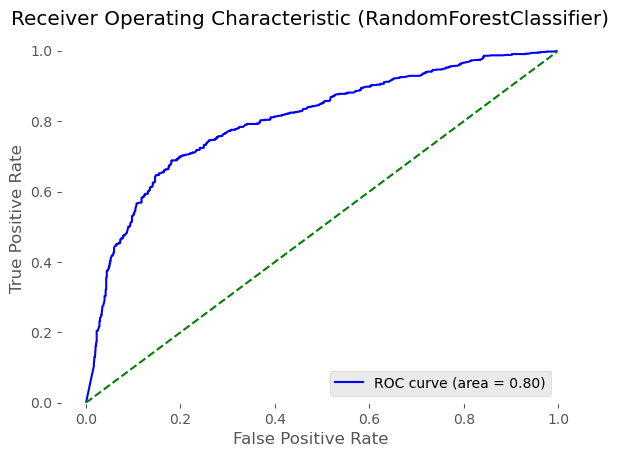

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
}

# Create the RandomForestClassifier model
rf_model = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_std, y_train)

# Get the best RandomForestClassifier model with the optimal hyperparameters
best_rf_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_rf = best_rf_model.predict(X_test_std)
y_rf_prob = best_rf_model.predict_proba(X_test_std)

print("Classification report for RandomForestClassifier:\n{}".format(classification_report(y_test, y_rf)))
print("Confusion matrix for RandomForestClassifier:\n{}".format(confusion_matrix(y_test, y_rf)))
print("Accuracy score for RandomForestClassifier: {:.2f}".format(accuracy_score(y_test, y_rf)))

# Calculate precision, recall, and F1 scores
prec_rf = precision_score(y_test, y_rf)
rec_rf = recall_score(y_test, y_rf)
f1_rf = f1_score(y_test, y_rf)
print("Precision score for RandomForestClassifier: {:.2f}".format(prec_rf))
print("Recall score for RandomForestClassifier: {:.2f}".format(rec_rf))
print("F1 score for RandomForestClassifier: {:.2f}".format(f1_rf))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_rf).ravel()
sens_rf = tp / (tp + fn)
spec_rf = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_rf_prob[:,1])
acc_rf = roc_auc_score(y_test, y_rf_prob[:,1])

print("Sensitivity score for RandomForestClassifier: {:.2f}".format(sens_rf))
print("Specificity score for RandomForestClassifier: {:.2f}".format(spec_rf))
print("AUC score for RandomForestClassifier: {:.2f}".format(acc_rf))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % acc_rf)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RandomForestClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [82]:
def plot_learning_curve(estimator, title, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Stunting among youth")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r"
    )
    
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g"
    )
    
    plt.plot(
        train_sizes,
        train_scores_mean,
        "o-",
        color="r",
        label="Training score"
    )
    
    plt.plot(
        train_sizes,
        test_scores_mean,
        "o-",
        color="g",
        label="Cross-validation score"
    )
    
    plt.legend(loc="best")
    return plt

def model_ranfor(X, x_test, y, y_test):
    ranfor_params = {
        "n_estimators": [100],
        "max_features": ["sqrt"],
        "min_samples_split": [18],
        "max_depth": [5]
    }
    
    ranfor_model = RandomForestClassifier(random_state=0)
    
    gs_cv = GridSearchCV(ranfor_model, ranfor_params, cv=5, n_jobs=-1, verbose=2).fit(X, y)
    
    best_params = gs_cv.best_params_
    ranfor_tuned = RandomForestClassifier(**best_params)
    
    scores_ranfor = cross_val_score(ranfor_tuned, X, y, cv=5)
    print(f"CrossValMeans: {round(scores_ranfor.mean(), 3)}")
    print(f"CrossValStandard Deviation: {round(scores_ranfor.std(), 5)}")
    
    ranfor_tuned.fit(X, y)
    plot_confusion_matrix(ranfor_tuned, x_test, y_test)
    
    print("Best parameters:")
    print(best_params)
    
    plt.title("Confusion matrix/Random Forest (RF)")
    plot_learning_curve(ranfor_tuned, "Learning curve/Random Forest (RF)", X, y, cv=5)
    
    plt.show()
    
    return best_params, ranfor_tuned

Fitting 5 folds for each of 1 candidates, totalling 5 fits
CrossValMeans: 0.657
CrossValStandard Deviation: 0.01654
Best parameters:
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 18, 'n_estimators': 100}


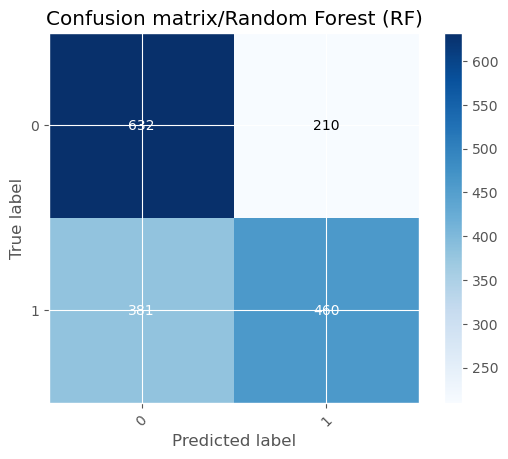

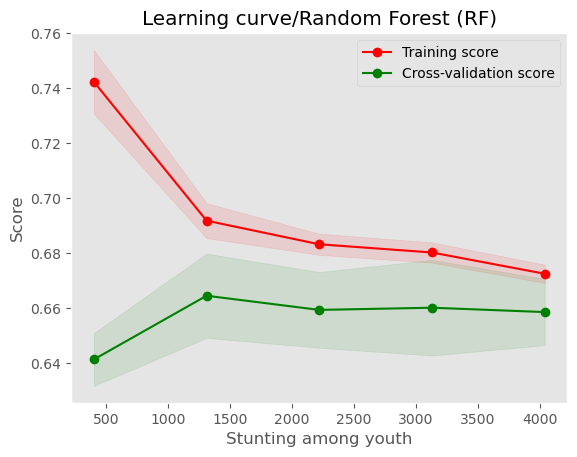

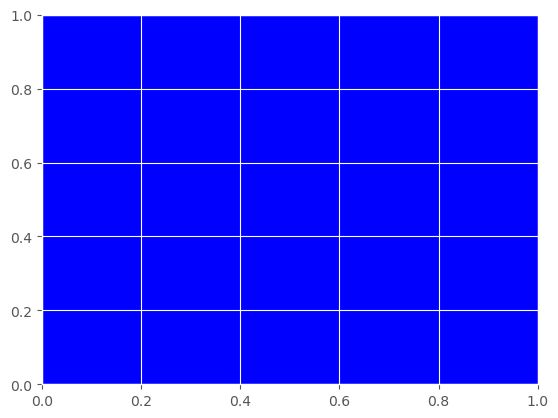

In [83]:
ranfor_params, ranfor_tuned = model_ranfor(X_train, X_test, y_train, y_test)
ax= plt.gca()
ax.set_facecolor("blue")

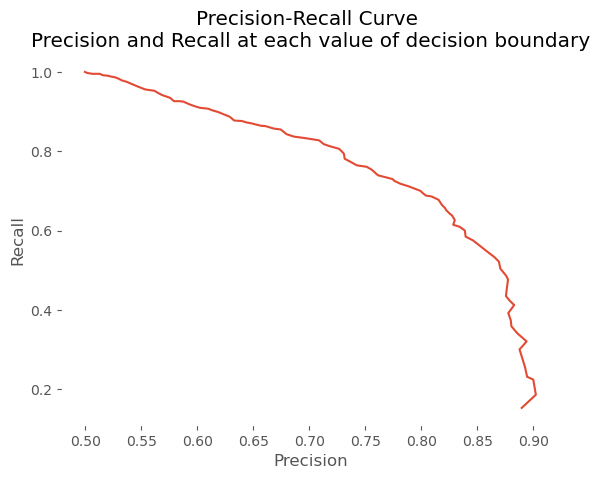

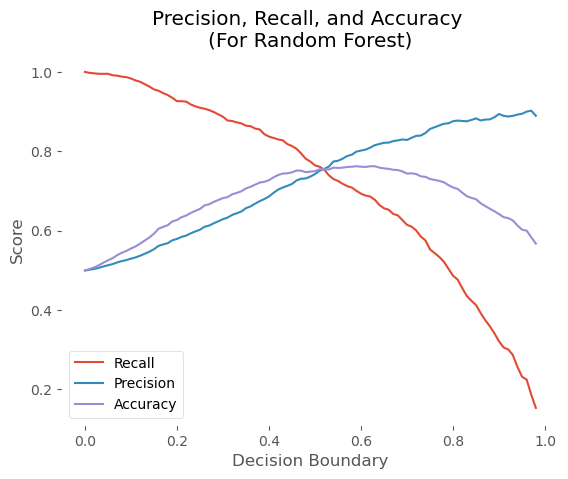

In [84]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(ranfor_model, X_test, y_test):
    y_scores = ranfor_model.predict_proba(X_test)[:, 1]
    precision = []
    recall = []
    accuracy = []

    # calculate precision and accuracy at each value of threshold - only up to 0.99 because no true values are predicted at 100% confidence!
    for threshold in np.arange(0, 0.99, 0.01):
        y_pred = np.where(y_scores >= threshold, 1, 0)

        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        accuracy.append(accuracy_score(y_test, y_pred))

    plt.figure()
    plt.plot(precision, recall)
    plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
    plt.xlabel('Precision')
    ax = plt.gca()
    ax.set_facecolor("white")
    plt.ylabel('Recall')

    plt.figure()
    plt.plot(np.arange(0, 0.99, 0.01), recall, label='Recall')
    plt.plot(np.arange(0, 0.99, 0.01), precision, label='Precision')
    plt.plot(np.arange(0, 0.99, 0.01), accuracy, label='Accuracy')
    plt.title('Precision, Recall, and Accuracy \n(For Random Forest)')
    plt.xlabel('Decision Boundary')
    plt.ylabel('Score')
    ax = plt.gca()
    ax.set_facecolor("white")
    plt.legend(facecolor='white')

    plt.show()

# Assuming you have a trained Random Forest model named ranfor_model
evaluate_model(ranfor_model, X_test, y_test)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

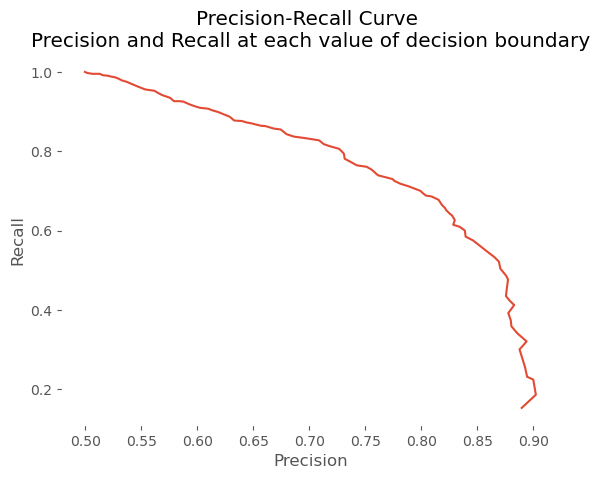

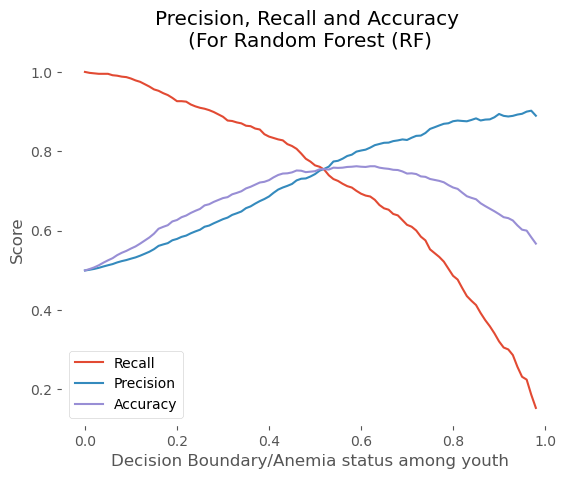

In [85]:
yprobs =ranfor_model.predict_proba(X_test)
yprobs = pd.DataFrame(yprobs)
precision = []
recall = []
accuracy = []

# calculate precision and accuracy at each value of threshold - only to 0.99 because no true values are predicted at 100% confidence!
for t in np.arange(0,0.99,0.01):
    tmp = yprobs
    tmp['Anemia_status'] = np.where(yprobs.iloc[:,1] >= t,1,0)
    
    precision.append(precision_score(y_test,tmp['Anemia_status']))
    recall.append(recall_score(y_test,tmp['Anemia_status']))
    accuracy.append(accuracy_score(y_test,tmp['Anemia_status']))
    plt.figure()
plt.plot(precision,recall)
plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
plt.xlabel('Precision')
ax= plt.gca()
ax.set_facecolor("white")
_ = plt.ylabel('Recall')
plt.figure()
plt.plot(np.arange(0,0.99,0.01),recall,label = 'Recall')
plt.plot(np.arange(0,0.99,0.01),precision,label = 'Precision')
plt.plot(np.arange(0,0.99,0.01),accuracy,label = 'Accuracy')
plt.title('Precision, Recall and Accuracy \n(For Random Forest (RF)')
plt.xlabel('Decision Boundary/Anemia status among youth')
plt.ylabel('Score')
ax= plt.gca()
ax.set_facecolor("white")
_= plt.legend(facecolor= 'white')


In [87]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import time

# Training the Gradient Boosting model
start = time.time()
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
end = time.time()
print("Finished training within {:.2f} seconds".format(end - start))

# Preprocessing the test set
scaler = StandardScaler()
X_test_std = scaler.fit_transform(X_test)

# Predicting the test set results
y_gb = gb_model.predict(X_test_std)
y_gb_prob = gb_model.predict_proba(X_test_std)

Finished training within 0.47 seconds


Classification report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.65      0.70      0.68       842
           1       0.68      0.63      0.65       841

    accuracy                           0.67      1683
   macro avg       0.67      0.67      0.67      1683
weighted avg       0.67      0.67      0.67      1683

Confusion matrix for GradientBoostingClassifier:
[[593 249]
 [313 528]]
Accuracy score for GradientBoostingClassifier: 0.67
Precision score for GradientBoostingClassifier: 0.68
Recall score for GradientBoostingClassifier: 0.63
F1 score for GradientBoostingClassifier: 0.65
Sensitivity score for GradientBoostingClassifier: 0.63
Specificity score for GradientBoostingClassifier: 0.70
AUC score for GradientBoostingClassifier: 0.75


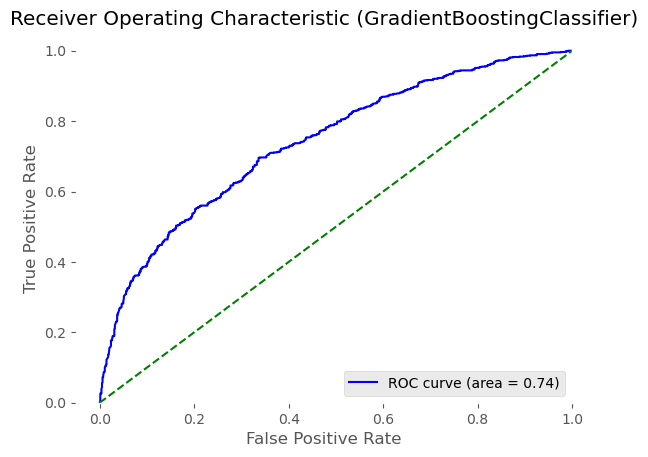

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001],
}

# Create the GradientBoostingClassifier model
gb_model = GradientBoostingClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(gb_model, param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_std, y_train)

# Get the best GradientBoostingClassifier model with the optimal hyperparameters
best_gb_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_gb = best_gb_model.predict(X_test_std)
y_gb_prob = best_gb_model.predict_proba(X_test_std)

print("Classification report for GradientBoostingClassifier:\n{}".format(classification_report(y_test, y_gb)))
print("Confusion matrix for GradientBoostingClassifier:\n{}".format(confusion_matrix(y_test, y_gb)))
print("Accuracy score for GradientBoostingClassifier: {:.2f}".format(accuracy_score(y_test, y_gb)))

# Calculate precision, recall, and F1 scores
prec_gb = precision_score(y_test, y_gb)
rec_gb = recall_score(y_test, y_gb)
f1_gb = f1_score(y_test, y_gb)
print("Precision score for GradientBoostingClassifier: {:.2f}".format(prec_gb))
print("Recall score for GradientBoostingClassifier: {:.2f}".format(rec_gb))
print("F1 score for GradientBoostingClassifier: {:.2f}".format(f1_gb))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_gb).ravel()
sens_gb = tp / (tp + fn)
spec_gb = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_gb_prob[:,1])
acc_gb = roc_auc_score(y_test, y_gb_prob[:,1])

print("Sensitivity score for GradientBoostingClassifier: {:.2f}".format(sens_gb))
print("Specificity score for GradientBoostingClassifier: {:.2f}".format(spec_gb))
print("AUC score for GradientBoostingClassifier: {:.2f}".format(auc_gb))

# Plot ROC curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % acc_gb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (GradientBoostingClassifier)')
ax.legend(loc="lower right")
ax.set_facecolor("white")
plt.show()

In [90]:
def plot_learning_curve(estimator, title, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Gradient boosting classifier")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r"
    )
    
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g"
    )
    
    plt.plot(
        train_sizes,
        train_scores_mean,
        "o-",
        color="r",
        label="Training score"
    )
    
    plt.plot(
        train_sizes,
        test_scores_mean,
        "o-",
        color="g",
        label="Cross-validation score"
    )
    
    plt.legend(loc="best")
    return plt

def model_gb(X, x_test, y, y_test):
    gb_params = {
        "n_estimators": [100],
        "learning_rate": [0.1],
        "max_depth": [3],
        "min_samples_split": [2],
        "subsample": [1.0]
    }
    
    gb_model = GradientBoostingClassifier(random_state=0)
    
    gs_cv = GridSearchCV(gb_model, gb_params, cv=5, n_jobs=-1, verbose=2).fit(X, y)
    
    best_params = gs_cv.best_params_
    gb_tuned = GradientBoostingClassifier(**best_params)
    
    scores_gb = cross_val_score(gb_tuned, X, y, cv=5)
    print(f"CrossValMeans: {round(scores_gb.mean(), 3)}")
    print(f"CrossValStandard Deviation: {round(scores_gb.std(), 5)}")
    
    gb_tuned.fit(X, y)
    plot_confusion_matrix(gb_tuned, x_test, y_test)
    
    print("Best parameters:")
    print(best_params)
    
    plt.title("Confussion matrix/Gradient Boosting (GB)")
    plot_learning_curve(gb_tuned, "Learning curve/Gradient Boosting (GB)", X, y, cv=5)
    
    plt.show()
    
    return best_params, gb_tuned

Fitting 5 folds for each of 1 candidates, totalling 5 fits
CrossValMeans: 0.666
CrossValStandard Deviation: 0.01318
Best parameters:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}


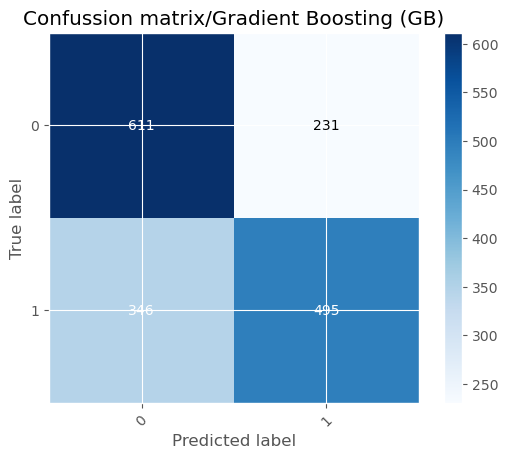

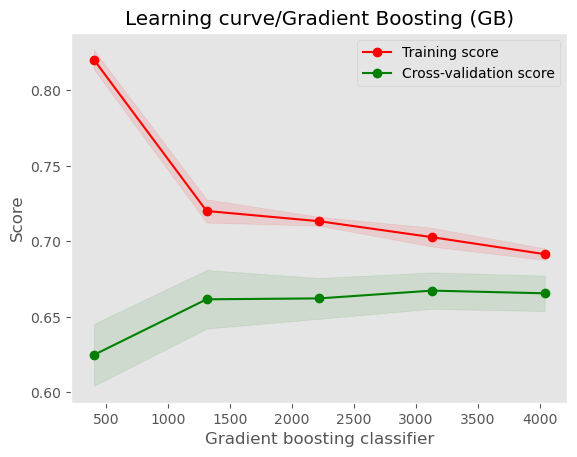

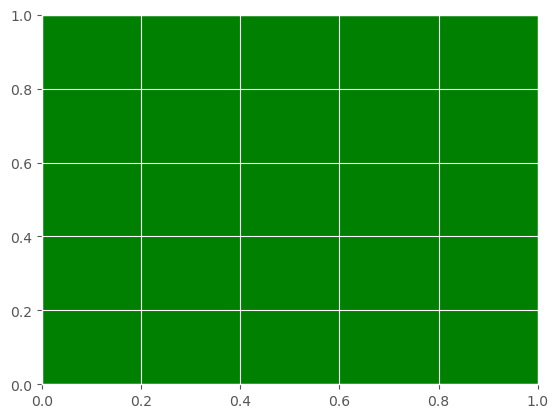

In [91]:
gb_params, gb_tuned = model_gb(X_train, X_test, y_train, y_test)
ax= plt.gca()
ax.set_facecolor("green")

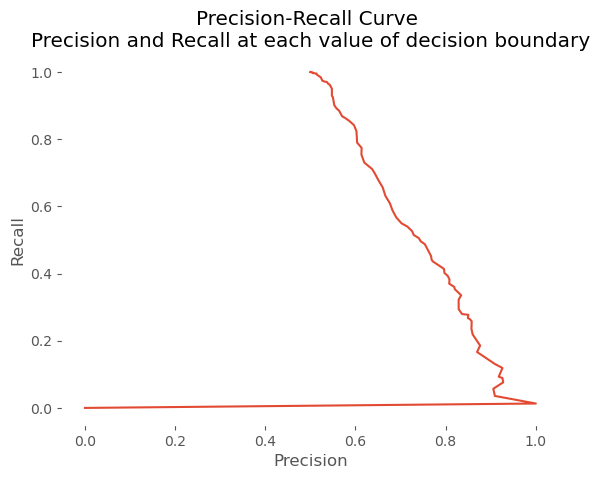

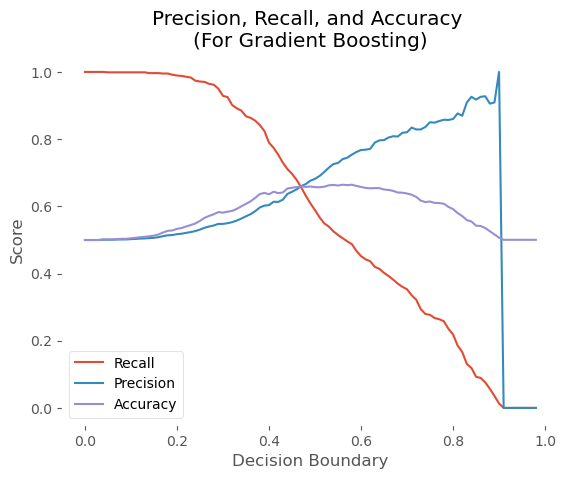

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(gb_model, X_test, y_test):
    # Fit the model with training data
    gb_model.fit(X_train, y_train)

    y_scores = gb_model.predict_proba(X_test)[:, 1]
    precision = []
    recall = []
    accuracy = []

    # Calculate precision and accuracy at each value of threshold - only up to 0.99 because no true values are predicted at 100% confidence!
    for threshold in np.arange(0, 0.99, 0.01):
        y_pred = np.where(y_scores >= threshold, 1, 0)

        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        accuracy.append(accuracy_score(y_test, y_pred))

    plt.figure()
    plt.plot(precision, recall)
    plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
    plt.xlabel('Precision')
    ax = plt.gca()
    ax.set_facecolor("white")
    plt.ylabel('Recall')

    plt.figure()
    plt.plot(np.arange(0, 0.99, 0.01), recall, label='Recall')
    plt.plot(np.arange(0, 0.99, 0.01), precision, label='Precision')
    plt.plot(np.arange(0, 0.99, 0.01), accuracy, label='Accuracy')
    plt.title('Precision, Recall, and Accuracy \n(For Gradient Boosting)')
    plt.xlabel('Decision Boundary')
    plt.ylabel('Score')
    ax = plt.gca()
    ax.set_facecolor("white")
    plt.legend(facecolor='white')

    plt.show()

# Assuming you have the training data X_train, y_train and the test data X_test, y_test
gb_model = GradientBoostingClassifier()
evaluate_model(gb_model, X_test, y_test)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

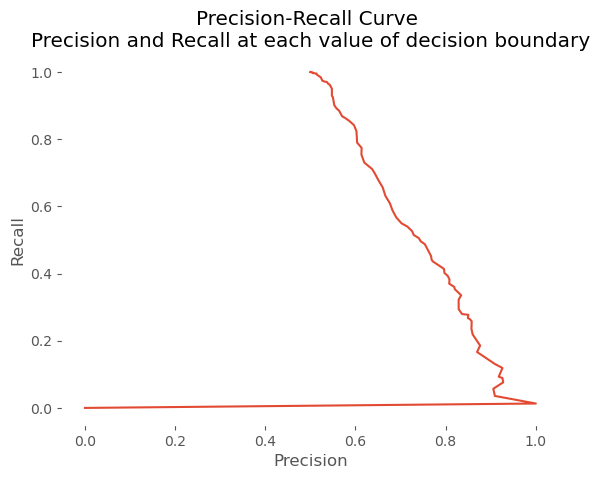

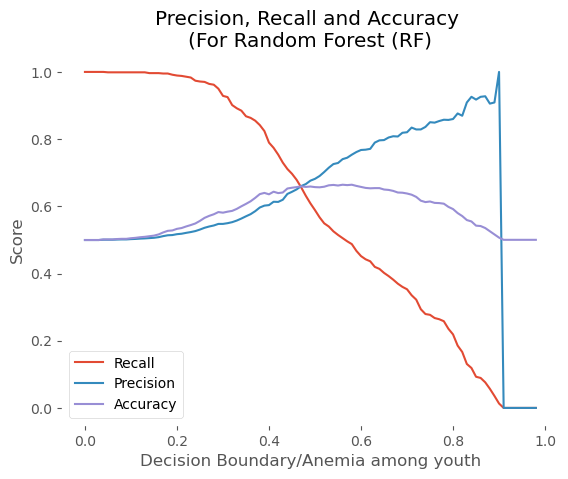

In [94]:
yprobs =gb_model.predict_proba(X_test)
yprobs = pd.DataFrame(yprobs)
precision = []
recall = []
accuracy = []

# calculate precision and accuracy at each value of threshold - only to 0.99 because no true values are predicted at 100% confidence!
for t in np.arange(0,0.99,0.01):
    tmp = yprobs
    tmp['Anemia_status'] = np.where(yprobs.iloc[:,1] >= t,1,0)
    
    precision.append(precision_score(y_test,tmp['Anemia_status']))
    recall.append(recall_score(y_test,tmp['Anemia_status']))
    accuracy.append(accuracy_score(y_test,tmp['Anemia_status']))
    plt.figure()
plt.plot(precision,recall)
plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
plt.xlabel('Precision')
ax= plt.gca()
ax.set_facecolor("white")
_ = plt.ylabel('Recall')
plt.figure()
plt.plot(np.arange(0,0.99,0.01),recall,label = 'Recall')
plt.plot(np.arange(0,0.99,0.01),precision,label = 'Precision')
plt.plot(np.arange(0,0.99,0.01),accuracy,label = 'Accuracy')
plt.title('Precision, Recall and Accuracy \n(For Random Forest (RF)')
plt.xlabel('Decision Boundary/Anemia among youth')
plt.ylabel('Score')
ax= plt.gca()
ax.set_facecolor("white")
_= plt.legend(facecolor= 'white')


In [95]:
start = timer.time()
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_xgb = xgb_model.predict(X_test_std)
y_xgb_prob = xgb_model.predict_proba(X_test_std)

Finished training within 0.32 seconds


Classification report for XGBoost:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       842
           1       0.71      0.71      0.71       841

    accuracy                           0.71      1683
   macro avg       0.71      0.71      0.71      1683
weighted avg       0.71      0.71      0.71      1683

Confusion matrix for XGBoost:
[[596 246]
 [247 594]]
Accuracy score for XGBoost: 0.71
Precision score for XGBoost: 0.71
Recall score for XGBoost: 0.71
F1 score for XGBoost: 0.71
Sensitivity score for XGBoost: 0.00
Specificity score for XGBoost: 1.00
AUC score for XGBoost: 0.78


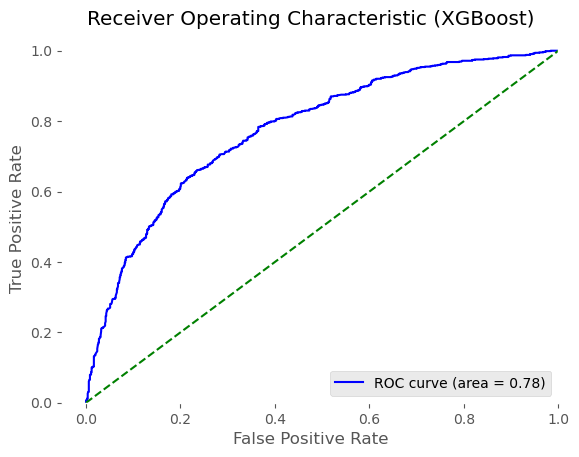

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model
y_xgb = best_xgb_model.predict(X_test)
y_xgb_prob = best_xgb_model.predict_proba(X_test)

# Classification report for XGBoost
print("Classification report for XGBoost:\n{}".format(classification_report(y_test, y_xgb)))

# Confusion matrix for XGBoost
print("Confusion matrix for XGBoost:\n{}".format(confusion_matrix(y_test, y_xgb)))

# Accuracy score for XGBoost
acc_xgb = accuracy_score(y_test, y_xgb)
print("Accuracy score for XGBoost: {:.2f}".format(acc_xgb))

# Precision, recall, and F1 scores for XGBoost
prec_xgb = precision_score(y_test, y_xgb)
rec_xgb = recall_score(y_test, y_xgb)
f1_xgb = f1_score(y_test, y_xgb)
print("Precision score for XGBoost: {:.2f}".format(prec_xgb))
print("Recall score for XGBoost: {:.2f}".format(rec_xgb))
print("F1 score for XGBoost: {:.2f}".format(f1_xgb))

# Sensitivity, specificity, and AUC for XGBoost
fpr, tpr, _ = roc_curve(y_test, y_xgb_prob[:, 1])
auc_xgb = roc_auc_score(y_test, y_xgb_prob[:, 1])
sens_xgb = tpr[1]
spec_xgb = 1 - fpr[1]
print("Sensitivity score for XGBoost: {:.2f}".format(sens_xgb))
print("Specificity score for XGBoost: {:.2f}".format(spec_xgb))
print("AUC score for XGBoost: {:.2f}".format(auc_xgb))

# Plotting the ROC curve for XGBoost
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(auc_xgb))
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGBoost)')
plt.legend(loc="lower right")
ax = plt.gca()
ax.set_facecolor("white")
plt.show()

In [98]:
#Using XGB
def model_xgb(X, x_test, y, y_test):
    params = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'booster': ['gbtree'],
        'gamma': [0.5, 1],
        'reg_alpha': [0.5, 1],
        'reg_lambda': [0.5, 1],
        'base_score': [0.2, 0.5]
    }
    
    model = XGBClassifier()
    gs_cv = RandomizedSearchCV(
        model, params, cv=10, n_jobs=-1, verbose=2
    ).fit(X, y)
    
    best_params = gs_cv.best_params_
    tuned_model = XGBClassifier(**best_params)
    scores = cross_val_score(tuned_model, X, y, cv=10)
    
    print(f"CrossValMeans: {round(scores.mean(), 3)}")
    print(f"CrossValStandard Deviation: {round(scores.std(), 3)}")
    
    tuned_model.fit(X, y)
    plot_confusion_matrix(tuned_model, x_test, y_test)
    
    print("Best parameters:")
    print(best_params)
    
    train_sizes, train_scores, test_scores = learning_curve(
        gs_cv.best_estimator_, X, y, cv=10, n_jobs=-1
    )
    
    plt.figure()
    plt.title("Learning Curve for XGBoost (XGB)")
    plt.xlabel("Stunting among youth")
    plt.ylabel("Score")
    plt.plot(
        train_sizes,
        np.mean(train_scores, axis=1),
        'o-',
        color="r",
        label="Training score",
    )
    plt.plot(
        train_sizes,
        np.mean(test_scores, axis=1),
        'o-',
        color="g",
        label="Cross-validation score",
    )
    plt.legend(loc="best")
    plt.grid()
    plt.show()
    
    return best_params, tuned_model

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CrossValMeans: 0.687
CrossValStandard Deviation: 0.021
Best parameters:
{'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 0.5, 'booster': 'gbtree', 'base_score': 0.2}


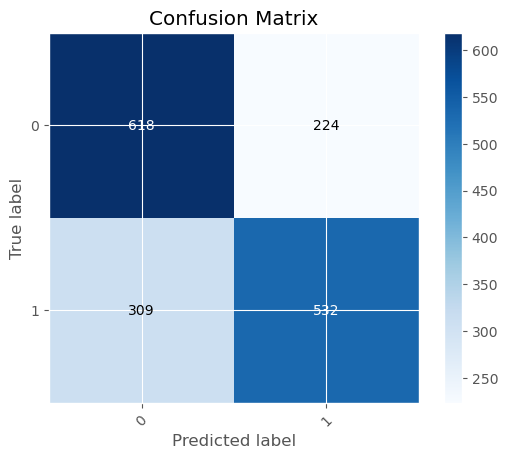

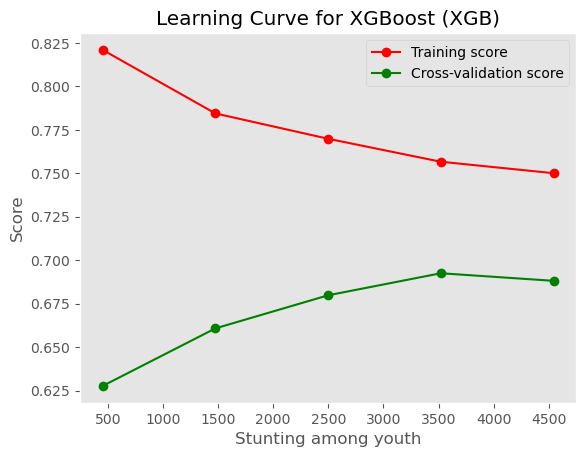

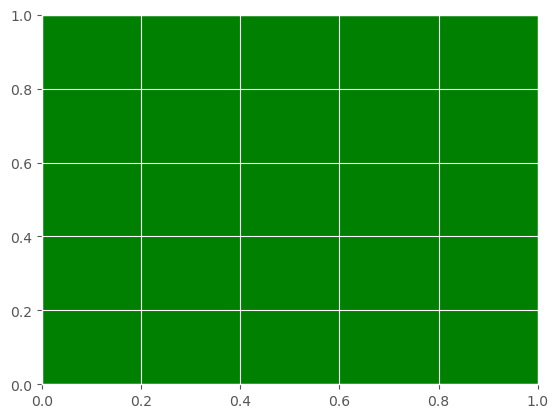

In [99]:
xgb_params, xgb_tuned = model_xgb(X_train, X_test, y_train, y_test)
ax= plt.gca()
ax.set_facecolor("green")

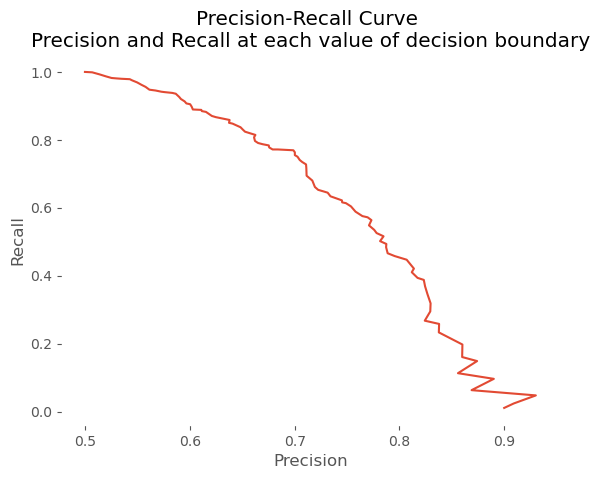

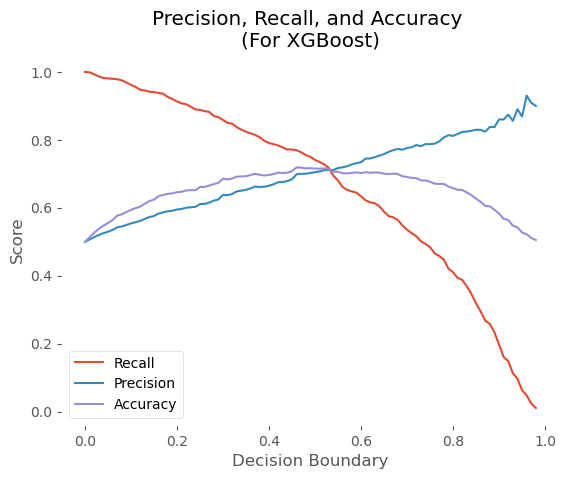

In [101]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Assuming you have your training and test data ready as X_train, y_train, X_test, and y_test
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Fit the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Now you can call the evaluate_model function
evaluate_model(xgb_model, X_test, y_test)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

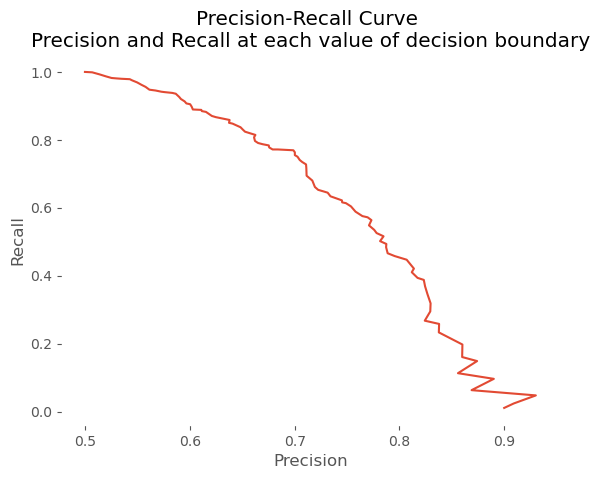

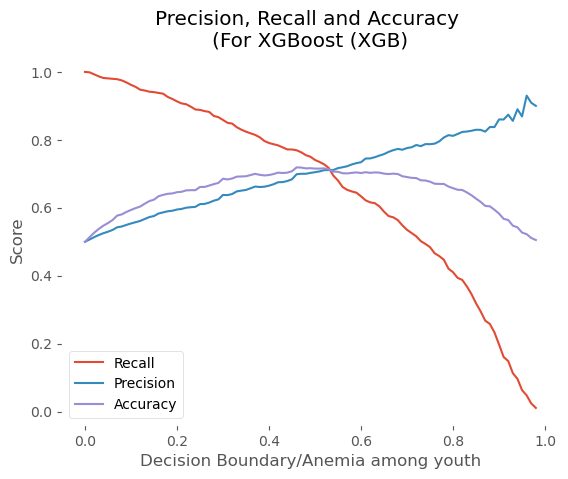

In [102]:
yprobs =xgb_model.predict_proba(X_test)
yprobs = pd.DataFrame(yprobs)
precision = []
recall = []
accuracy = []

# calculate precision and accuracy at each value of threshold - only to 0.99 because no true values are predicted at 100% confidence!
for t in np.arange(0,0.99,0.01):
    tmp = yprobs
    tmp['Anemia_status'] = np.where(yprobs.iloc[:,1] >= t,1,0)
    
    precision.append(precision_score(y_test,tmp['Anemia_status']))
    recall.append(recall_score(y_test,tmp['Anemia_status']))
    accuracy.append(accuracy_score(y_test,tmp['Anemia_status']))
    plt.figure()
plt.plot(precision,recall)
plt.title('Precision-Recall Curve \nPrecision and Recall at each value of decision boundary')
plt.xlabel('Precision')
ax= plt.gca()
ax.set_facecolor("white")
_ = plt.ylabel('Recall')
plt.figure()
plt.plot(np.arange(0,0.99,0.01),recall,label = 'Recall')
plt.plot(np.arange(0,0.99,0.01),precision,label = 'Precision')
plt.plot(np.arange(0,0.99,0.01),accuracy,label = 'Accuracy')
plt.title('Precision, Recall and Accuracy \n(For XGBoost (XGB)')
plt.xlabel('Decision Boundary/Anemia among youth')
plt.ylabel('Score')
ax= plt.gca()
ax.set_facecolor("white")
_= plt.legend(facecolor= 'white')


In [104]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time

# Assuming you have your training and test data ready as X_train and y_train

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Create a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=15)

# Train the KNN model
start = time.time()
knn_model.fit(X_train_std, y_train)
end = time.time()
print("Finished training within {:.2f} seconds".format(end - start))

# Predict on the test set
y_knn = knn_model.predict

Finished training within 0.03 seconds


Classification report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       842
           1       0.67      0.74      0.70       841

    accuracy                           0.69      1683
   macro avg       0.69      0.69      0.69      1683
weighted avg       0.69      0.69      0.69      1683

Confusion matrix for KNeighborsClassifier:
[[533 309]
 [217 624]]
Accuracy score for KNeighborsClassifier: 0.69
Precision score for KNeighborsClassifier: 0.67
Recall score for KNeighborsClassifier: 0.74
F1 score for KNeighborsClassifier: 0.70


Classification report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       842
           1       0.67      0.74      0.70       841

    accuracy                           0.69      1683
   macro avg       0.69      0.69      0.69      1683
weighted avg       0.69      0.69      0.69      1683

Confusion matrix for KNeighborsClassifier:
[[533 309]
 [217 624]]
Accuracy score for KNeighborsClassifier: 0.69
Precision score for KNeighborsClassifier: 0.67
Recall score for KNeighborsClassifier: 0.74
F1 score for KNeighborsClassifier: 0.70
Sensitivity score for KNeighborsClassifier: 0.74
Specificity score for KNeighborsClassifier: 0.63
AUC score for KNeighborsClassifier: 0.77


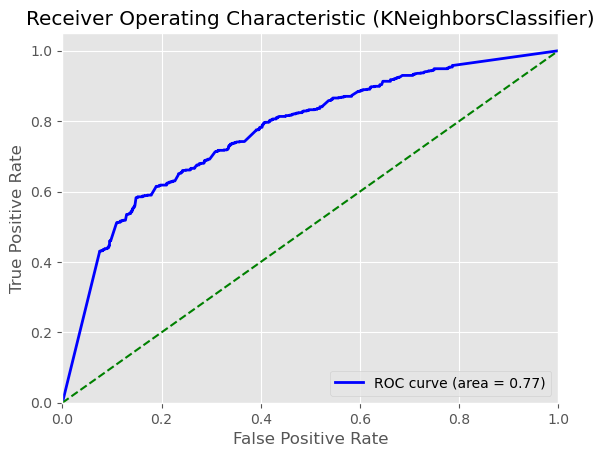

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

# Create the KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_std, y_train)

# Get the best KNeighborsClassifier model with optimal hyperparameters
best_knn_model = grid_search.best_estimator_

# Predict the test set results using the best model
y_knn = best_knn_model.predict(X_test_std)
y_knn_prob = best_knn_model.predict_proba(X_test_std)

print("Classification report for KNeighborsClassifier:\n{}".format(classification_report(y_test, y_knn)))
print("Confusion matrix for KNeighborsClassifier:\n{}".format(confusion_matrix(y_test, y_knn)))
print("Accuracy score for KNeighborsClassifier: {:.2f}".format(accuracy_score(y_test, y_knn)))

# Calculate precision, recall, and F1 scores
prec_knn = precision_score(y_test, y_knn)
rec_knn = recall_score(y_test, y_knn)
f1_knn = f1_score(y_test, y_knn)
print("Precision score for KNeighborsClassifier: {:.2f}".format(prec_knn))
print("Recall score for KNeighborsClassifier: {:.2f}".format(rec_knn))
print("F1 score for KNeighborsClassifier: {:.2f}".format(f1_knn))

# Calculate sensitivity, specificity, and AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_knn).ravel()
sens_knn = tp / (tp + fn)
spec_knn = tn / (tn + fp)
fpr, tpr, _ = roc_curve(y_test, y_knn_prob[:,1])
acc_knn = roc_auc_score(y_test, y_knn_prob[:,1])

print("Sensitivity score for KNeighborsClassifier: {:.2f}".format(sens_knn))
print("Specificity score for KNeighborsClassifier: {:.2f}".format(spec_knn))
print("AUC score for KNeighborsClassifier: {:.2f}".format(auc_knn))

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc_knn))
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (KNeighborsClassifier)')
plt.legend(loc="lower right")
plt.show()

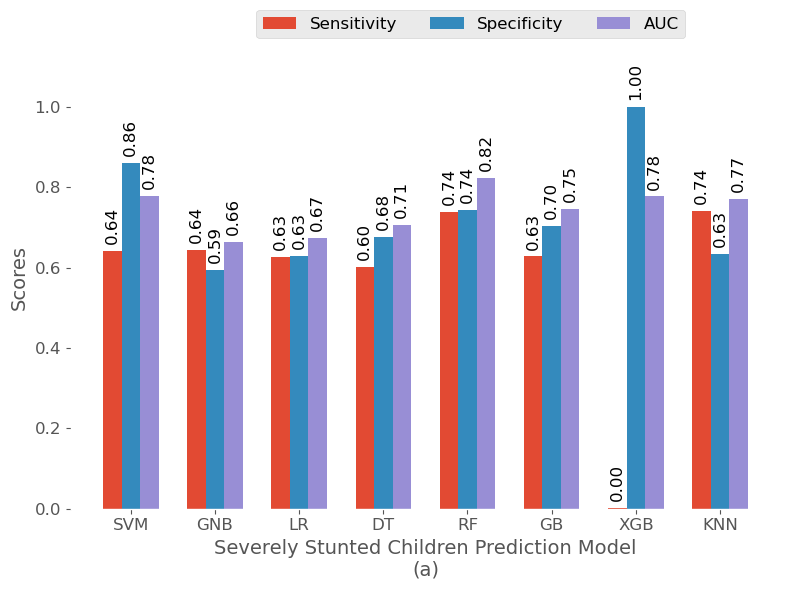

In [126]:
import numpy as np
import matplotlib.pyplot as plt

ml_names = ['SVM', 'GNB', 'LR', 'DT', 'RF', 'GB', 'XGB', 'KNN']

prec_all = [prec_svm, prec_gnb, prec_logit, prec_dtree, prec_rf, prec_gb, prec_xgb, prec_knn]
rec_all = [rec_svm, rec_gnb, rec_logit, rec_dtree, rec_rf, rec_gb, rec_xgb, rec_knn]
f1_all = [f1_svm, f1_gnb, f1_logit, f1_dtree, f1_rf, f1_gb, f1_xgb, f1_knn]
acc_all = [acc_svm, acc_gnb, acc_logit, acc_dtree, acc_rf, acc_gb, acc_xgb, acc_knn]

sens_all = [sens_svm, sens_gnb, sens_logit, sens_dtree, sens_rf, sens_gb, sens_xgb, sens_knn]
spec_all = [spec_svm, spec_gnb, spec_logit, spec_dtree, spec_rf, spec_gb, spec_xgb, spec_knn]
auc_all = [auc_svm, auc_gnb, auc_logit, auc_dtree, auc_rf, auc_gb, auc_xgb, auc_knn]


def autolabel(bars):
    """Attach a text label above each bar to display its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')


width = 0.22  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

# Plot sensitivity, specificity, and AUC
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(r1, sens_all, width, label='Sensitivity')
bar2 = ax.bar(r2, spec_all, width, label='Specificity')
bar3 = ax.bar(r3, auc_all, width, label='AUC')

ax.set_ylim([0, 1.15])
ax.set_ylabel('Scores', fontsize=14)
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Severely Stunted Children Prediction Model\n(a)", fontsize=14)
ax.legend(loc='lower left', ncol=4, bbox_to_anchor=(0.25, 1), fontsize=12)  # corrected line
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_auc.pdf", bbox_inches='tight')
ax.set_facecolor("white")
plt.show()

# Plot precision,

In [128]:
logit_model.fit(X_train, y_train)

LogisticRegression()

In [130]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [132]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [134]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [136]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

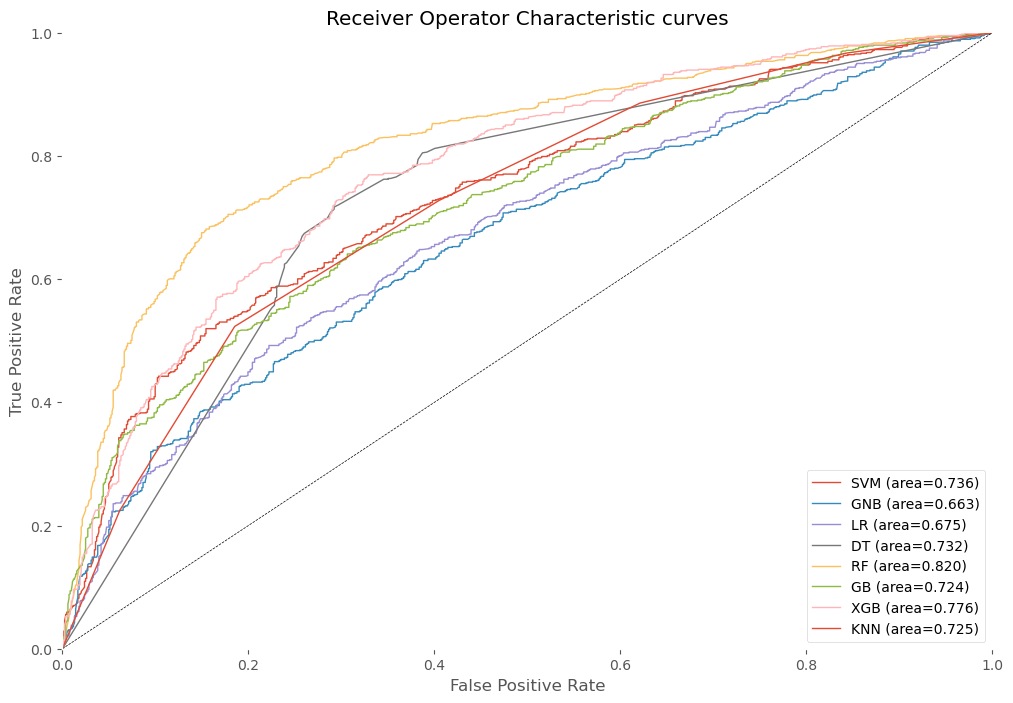

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0, ax=None):
    fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)" % (label, roc_auc_score(y_true, y_proba[:, 1])))

f, ax = plt.subplots(figsize=(12, 8))

roc_auc_plot(y_test, svm_model.predict_proba(X_test), label='SVM', l='-', ax=ax)
roc_auc_plot(y_test, gnb_model.predict_proba(X_test), label='GNB', l='-', ax=ax)
roc_auc_plot(y_test, logit_model.predict_proba(X_test), label='LR', l='-', ax=ax)
roc_auc_plot(y_test, dtree_model.predict_proba(X_test), label='DT', l='-', ax=ax)
roc_auc_plot(y_test, ranfor_model.predict_proba(X_test), label='RF', l='-', ax=ax)
roc_auc_plot(y_test, gb_model.predict_proba(X_test), label='GB', l='-', ax=ax)
roc_auc_plot(y_test, xgb_model.predict_proba(X_test), label='XGB', l='-', ax=ax)
roc_auc_plot(y_test, knn_model.predict_proba(X_test), label='KNN', l='-', ax=ax)

ax.plot([0, 1], [0, 1], color='k', linewidth=0.5, linestyle='--')
ax.legend(loc="lower right", facecolor='white')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()
ax.set_facecolor("white")

plt.show()